<img src="https://github.com/Sengsathit/OCR_data_scientist_assets/blob/main/header_seattle.png?raw=true" alt="Alternative text" />

**Table of contents**<a id='toc0_'></a>    
- [1 - Introduction](#toc1_)    
- [2 - Importations et configurations](#toc2_)    
- [3 - Chargement des données](#toc3_)    
- [4 - Fonctions ré-utilisatbles](#toc4_)    
  - [Fonctions pour la manipulation et le traitement de données](#toc4_1_)    
    - [• Pour les outliers](#toc4_1_1_)    
    - [• Pour les valeurs manquantes](#toc4_1_2_)    
    - [• Pour les valeurs négatives](#toc4_1_3_)    
  - [Fonctions pour la visualisation de données](#toc4_2_)    
- [5 - Compréhension initiale des données](#toc5_)    
  - [Aperçu global](#toc5_1_)    
  - [Valeurs manquantes](#toc5_2_)    
  - [Valeurs dupliquées](#toc5_3_)    
- [6 - Traitement et nettoyage préliminaire](#toc6_)    
  - [Filtrage par type de propriétés](#toc6_1_)    
  - [Traitement des valeurs manquantes](#toc6_2_)    
    - [• Variables sur-impactées par les NaN](#toc6_2_1_)    
    - [• Les codes postaux](#toc6_2_2_)    
    - [• L'usage principal des propriétés](#toc6_2_3_)    
    - [• L'usage secondaire et teriaire des propriétés](#toc6_2_4_)    
    - [• La consommation en énergie](#toc6_2_5_)    
  - [Traitement des valeurs négatives](#toc6_3_)    
  - [Remplacement de valeurs](#toc6_4_)    
- [7 - Analyse exploratoire univariée](#toc7_)    
  - [Target (variable cible)](#toc7_1_)    
  - [Les types de propriétés](#toc7_2_)    
  - [Localisation des propriétés](#toc7_3_)    
    - [Coordonnées géographiques](#toc7_3_1_)    
    - [Map](#toc7_3_2_)    
    - [Répartition par quartier](#toc7_3_3_)    
    - [Âges](#toc7_3_4_)    
  - [Configuration des propriétés](#toc7_4_)    
  - [Surfaces au sol](#toc7_5_)    
  - [Indicateurs énergétiques](#toc7_6_)    
  - [Consommation d'énergie](#toc7_7_)    
    - [Consommation par type d'énergie](#toc7_7_1_)    
    - [Consommation sur site et de la consommation depuis la source d'énergie](#toc7_7_2_)    
    - [Intensité de la consommation sur site et de la consommation depuis la source d'énergie](#toc7_7_3_)    
- [8 - Analyse exploratoire multivariée](#toc8_)    
  - [Relation entre la target et les autres variables](#toc8_1_)    
    - [Target / Type de propriété](#toc8_1_1_)    
    - [Target / Localisation](#toc8_1_2_)    
    - [Target / Age de la propriété](#toc8_1_3_)    
    - [Target / Energy score](#toc8_1_4_)    
    - [Target / Autres variables](#toc8_1_5_)    
- [9 - Conclusions initiales](#toc9_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[1 - Introduction](#toc0_)

Le dataset "2016 Building Energy Benchmarking" fait partie du programme de benchmarking énergétique et de rapport des bâtiments de Seattle, imposé par le Code Municipal de Seattle 22.920 dans le but de formuler un politique et d'encourager des efforts visant à améliorer l'efficacité énergétique du parc immobilier de la ville.

Ce programme oblige les propriétaires de bâtiments non résidentiels et multifamiliaux de 20 000 pieds carrés ou plus à suivre et à rapporter annuellement leurs performances énergétiques à la ville de Seattle.

Le dataset inclut des informations détaillées sur l'utilisation et l'efficacité énergétique des bâtiments de la ville. Ces informations serviront à l'analyse et à la mise en place d'un système de prédiction sur les émissions de CO2 ainsi que de la consommatione d'énergie.

# <a id='toc2_'></a>[2 - Importations et configurations](#toc0_)

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

# Configurer Pandas pour un affichage complet du contenu des colonnes
#pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

plt.rcParams['figure.facecolor'] = '#FFFCF7'    # Définir la couleur de fond de la figure
plt.rcParams['axes.facecolor'] = '#FFFCF7'      # Définir la couleur de fond des axes

# <a id='toc3_'></a>[3 - Chargement des données](#toc0_)

In [121]:
# Chargement du dataset de l'année 2016
df_initial = pd.read_csv("../datasets/2016_Building_Energy_Benchmarking.csv")
df = df_initial.copy()

df.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

# <a id='toc4_'></a>[4 - Fonctions ré-utilisatbles](#toc0_)

## <a id='toc4_1_'></a>[Fonctions pour la manipulation et le traitement de données](#toc0_)

### <a id='toc4_1_1_'></a>[• Pour les outliers](#toc0_)

In [122]:
# Fonction pour récupérer les lignes contenant des outliers pour une variable donnée
def get_lines_with_outliers_for_column(df_to_check: pd.DataFrame, feature: str) -> pd.DataFrame:
    # Calcul des quartiles et de l'IQR
    Q1 = df_to_check[feature].quantile(0.25)
    Q3 = df_to_check[feature].quantile(0.75)
    IQR = Q3 - Q1
    # Bornes pour les outliers
    edge_low = Q1 - 1.5 * IQR
    edge_high = Q3 + 1.5 * IQR

    return df_to_check[(df_to_check[feature] < edge_low) | (df_to_check[feature] > edge_high)]

In [123]:
# Fonction pour lister toutes les variables quantitatives et leur nombre d'outliers
def check_outliers(df_to_check: pd.DataFrame, feature: str = None):
    dict = {}

    if feature is None:
        for col in df_to_check.select_dtypes("number"):
            dict[col] = get_lines_with_outliers_for_column(df_to_check, col).shape[0]
    else:
        dict[feature] = get_lines_with_outliers_for_column(df_to_check, feature).shape[0]
    
    sorted_outliers = sorted(dict.items(), key=lambda item: item[1], reverse=True)

    print(f"Liste des variables numériques et leur nombre d'outliers")
    print("_________________________________________________________")
    [print(f"{col} : {nb_outliers}") for col, nb_outliers in sorted_outliers]

### <a id='toc4_1_2_'></a>[• Pour les valeurs manquantes](#toc0_)

In [124]:
# Fonction pour remplacer des valeurs manquantes par une valeur donnée
def replace_na_by_value(df_to_update: pd.DataFrame, subset: list[str], value: any):
    for feature in subset:
        df_to_update.loc[df_to_update[feature].isna(), feature] = value

### <a id='toc4_1_3_'></a>[• Pour les valeurs négatives](#toc0_)

In [125]:
# Fonction pour détecter les valeurs négatives dans un DataFrame
def check_negative_values(df_to_check: pd.DataFrame):
    print("Variables avec des valeurs négatives :")
    print("______________________________________")

    has_negatives = False

    for feature in df.select_dtypes("number").columns:
        count_negative = df[feature].lt(0).sum()
        if count_negative > 0:
            has_negatives = True
            print(f"{feature} : {count_negative}")
    
    if not has_negatives:
        print("Aucune variable avec des valeurs négatives.")

## <a id='toc4_2_'></a>[Fonctions pour la visualisation de données](#toc0_)

In [126]:
# Fonction pour générer une matrice des valeurs manquantes d'un DataFrame
def generate_matrix_na(
        df_to_check: pd.DataFrame, 
        image_name: str, 
        figsize=(20, 10)):
    
    plt.figure(figsize=figsize)
    sns.heatmap(df_to_check.isna(), cbar=False, cmap=['black', 'white'])
    plt.title("Valeurs manquantes", fontsize = 16)
    plt.ylabel("observations")

    # Ajout d'une légende
    data_present_patch = mpatches.Patch(color='black', label='Donnée présente')
    data_absent_patch = mpatches.Patch(color='white', label='Donnée absente')
    plt.legend(handles=[data_present_patch, data_absent_patch], loc="upper left")

    plt.savefig(f"../images/{image_name}", bbox_inches = 'tight')

In [127]:
# Fonction pour générer un histogramme
def generate_histplot(
        df_to_check: pd.DataFrame, 
        feature: str, 
        title: str, 
        x_label: str,
        y_label: str, 
        image_name: str,
        color: str = None):
    
    plt.figure(figsize=(10, 6), dpi=100)
    ax = sns.histplot(df_to_check, x=df[feature].values, bins=50, color=color)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

    image_name = image_name.replace("/", "_").lower()
    ax.figure.savefig(f"../images/histplot_{image_name}")
    plt.show()

In [128]:
# Fonction pour générer un diagramme à barres
def generate_barplot(x_values, y_values, title, y_label, figsize=(12, 8), palette=None, hue=None):
    plt.figure(figsize=figsize, dpi=100)
    ax = sns.barplot(x=x_values, y=y_values, palette=palette, hue=hue)
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_ylabel(y_label)
    ax.set_xticks(x_values)
    ax.set_xticklabels(x_values, rotation=45)
    
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    plt.tight_layout()
    plt.show()

# <a id='toc5_'></a>[5 - Compréhension initiale des données](#toc0_)

## <a id='toc5_1_'></a>[Aperçu global](#toc0_)

Le dataset présente 3376 observations avec 46 variables

In [129]:
# Dimensions des données
df.shape

(3376, 46)

Les données du dataset sont de plusieurs types. Il y a des valeurs quantitatives, des valeurs qualitatives et des valeurs booléennes.

- float64 = 22
- object = 15
- int64 = 8
- bool = 1

Les valeurs quantitatives peuvent être continues (ex : `Electricity(kWh)`) ou discrètes (ex : `ZipCode`, `CouncilDistrictCode`).

Les valeurs qualitatives sont exclusivements nominales, aucune variable ordinale. Certaines de ces valeurs qualitatives sont multi-catégorielles (ex : `ListOfAllPropertyUseTypes`)

Les targets de notre projet sont identifiées, ce sont les variables <u>**TotalGHGEmissions**</u> et <u>**SiteEnergyUse(kBtu)**</u>. 

La première représente les émissions totales de gaz à effet de serre, telles que le dioxyde de carbone, le méthane et l'oxyde nitreux. Ces émissions sont mesurées en tonnes métriques d'équivalent dioxyde de carbone.

La seconde représente la consommation énergétique totale en kBtu non normalisé par rapport aux contraintes météorologiques.

In [130]:
# Aperçu des premières lignes
df.sample(5)

OSEBuildingID  DataYear          BuildingType    PrimaryPropertyType  \
3302          50014      2016  Multifamily HR (10+)  High-Rise Multifamily   
3142          41987      2016  Multifamily MR (5-9)   Mid-Rise Multifamily   
2810          27042      2016  Multifamily MR (5-9)   Mid-Rise Multifamily   
2914          27459      2016  Multifamily LR (1-4)   Low-Rise Multifamily   
2574          26138      2016  Multifamily MR (5-9)   Mid-Rise Multifamily   

                      PropertyName                  Address     City State  \
3302              Premiere on Pine             1525 9th ave  Seattle    WA   
3142          WA021_AVA Queen Anne      330 3rd Avenue West  Seattle    WA   
2810             Uwajimaya Village     521 South Weller St.  Seattle    WA   
2914  The Gilbert House Apartments  1529 Queen Anne Ave. N.  Seattle    WA   
2574                  Union Harbor      2301 Fairview Ave E  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
3302  98101.0                    0660000915                    7   
3142  98119.0                    1989200620                    7   
2810  98104.0                    8849050000                    2   
2914  98109.0                    4232903850                    7   
2574  98102.0                    8807200000                    4   

               Neighborhood  Latitude  Longitude  YearBuilt  \
3302               DOWNTOWN  47.61324 -122.33223       2014   
3142  MAGNOLIA / QUEEN ANNE  47.62120 -122.36016       2011   
2810               DOWNTOWN  47.59774 -122.32730       2000   
2914  MAGNOLIA / QUEEN ANNE  47.63338 -122.35738       2005   
2574             LAKE UNION  47.64010 -122.33003       1968   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
3302                1.0              41            499477                   0   
3142                1.0               6            290520                   0   
2810                1.0               5            294707               71557   
2914                1.0               4             87261                   0   
2574                1.0               5             53862                   0   

      PropertyGFABuilding(s)                    ListOfAllPropertyUseTypes  \
3302                  499477     Multifamily Housing, Parking, Restaurant   
3142                  290520                          Multifamily Housing   
2810                  223150   Multifamily Housing, Parking, Retail Store   
2914                   87261                          Multifamily Housing   
2574                   53862  Multifamily Housing, Parking, Swimming Pool   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
3302    Multifamily Housing                   307810.0   
3142    Multifamily Housing                   203481.0   
2810    Multifamily Housing                   156378.0   
2914    Multifamily Housing                    97425.0   
2574    Multifamily Housing                    48786.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
3302                      Parking                         100000.0   
3142                          NaN                              NaN   
2810                      Parking                          71557.0   
2914                          NaN                              NaN   
2574                      Parking                           5076.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
3302                         NaN                             NaN   
3142                         NaN                             NaN   
2810                Retail Store                         66772.0   
2914                         NaN                             NaN   
2574               Swimming Pool                             0.0   

     YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3302                      NaN             40.0         67.099998   
3142           

In [131]:
# Indications globales
display(df.dtypes.sort_values())
df.dtypes.value_counts()

DefaultData                           bool
OSEBuildingID                        int64
DataYear                             int64
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
NumberofFloors                       int64
CouncilDistrictCode                  int64
YearBuilt                            int64
ENERGYSTARScore                    float64
SiteEUI(kBtu/sf)                   float64
SiteEUIWN(kBtu/sf)                 float64
SourceEUI(kBtu/sf)                 float64
SiteEnergyUse(kBtu)                float64
ThirdLargestPropertyUseTypeGFA     float64
SiteEnergyUseWN(kBtu)              float64
SteamUse(kBtu)                     float64
Electricity(kWh)                   float64
Electricity(kBtu)                  float64
NaturalGas(therms)                 float64
NaturalGas(kBtu)                   float64
Comments                           float64
SourceEUIWN(kBtu/sf)               float64
SecondLarge

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

In [132]:
# Variables quantitatives
for col in df.select_dtypes("number"):
    print(f"{col}")
    print(''.join(["_" for _ in range(len(col))]))
    print(f"{df[col].unique()}")
    print("\n")

OSEBuildingID
_____________
[    1     2     3 ... 50224 50225 50226]


DataYear
________
[2016]


ZipCode
_______
[98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan]


CouncilDistrictCode
___________________
[7 3 2 4 5 6 1]


Latitude
________
[47.6122  47.61317 47.61393 ... 47.56722 47.52832 47.53939]


Longitude
_________
[-122.33799 -122.33393 -122.3381  ... -122.37441 -122.31154 -122.29536]


YearBuilt
_________
[1927 1996 1969 1926 1980 1999 1904 1910 1998 1928 1922 2004 1930 1983
 1907 1916 1985 1961 2001 1991 1955 1978 1949 1989 1906 1994 1992 1990
 1950 1900 1954 1911 1973 1920 1982 1908 1959 2000 1997 1962 1970 2008
 1948 1965 1929 201

In [133]:
# Variables qualitatives
for col in df.select_dtypes("object"):
    print(f"{col}")
    print(''.join(["_" for _ in range(len(col))]))
    print(f"{df[col].unique()}")
    print("\n")

BuildingType
____________
['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


PrimaryPropertyType
___________________
['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']


PropertyName
____________
['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle' ...
 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']


Address
_______
['405 Olive way' '724 Pine street' '1900 5th Avenue' ... '1920 1st Ave W'
 '8319 8th Ave S' '2820 S Myrtle St']


City
____
['Seattle']

## <a id='toc5_2_'></a>[Valeurs manquantes](#toc0_)

Le dataset montre un taux global de valeurs manquantes de près de 13%

In [134]:
# Taux de valeurs manquantes global
df.isna().mean().mean()

0.12847723057902327

Parmi les variables, plus de la moitié, soit 26 au total, comportent des données manquantes :

- Un grand nombre de ces variables sont légèrement impactées, avec moins de 1% de données manquantes.

- La variable `ENERGYSTARScore` est modérément touchée, présentant 25% de valeurs manquantes.

- Sept variables affichent un taux de données manquantes élevé. Ces variables sont `Comments`, `Outlier`, `YearsENERGYSTARCertified`, `ThirdLargestPropertyUseType`, `ThirdLargestPropertyUseTypeGFA`, `SecondLargestPropertyUseType`, et `SecondLargestPropertyUseTypeGFA`.

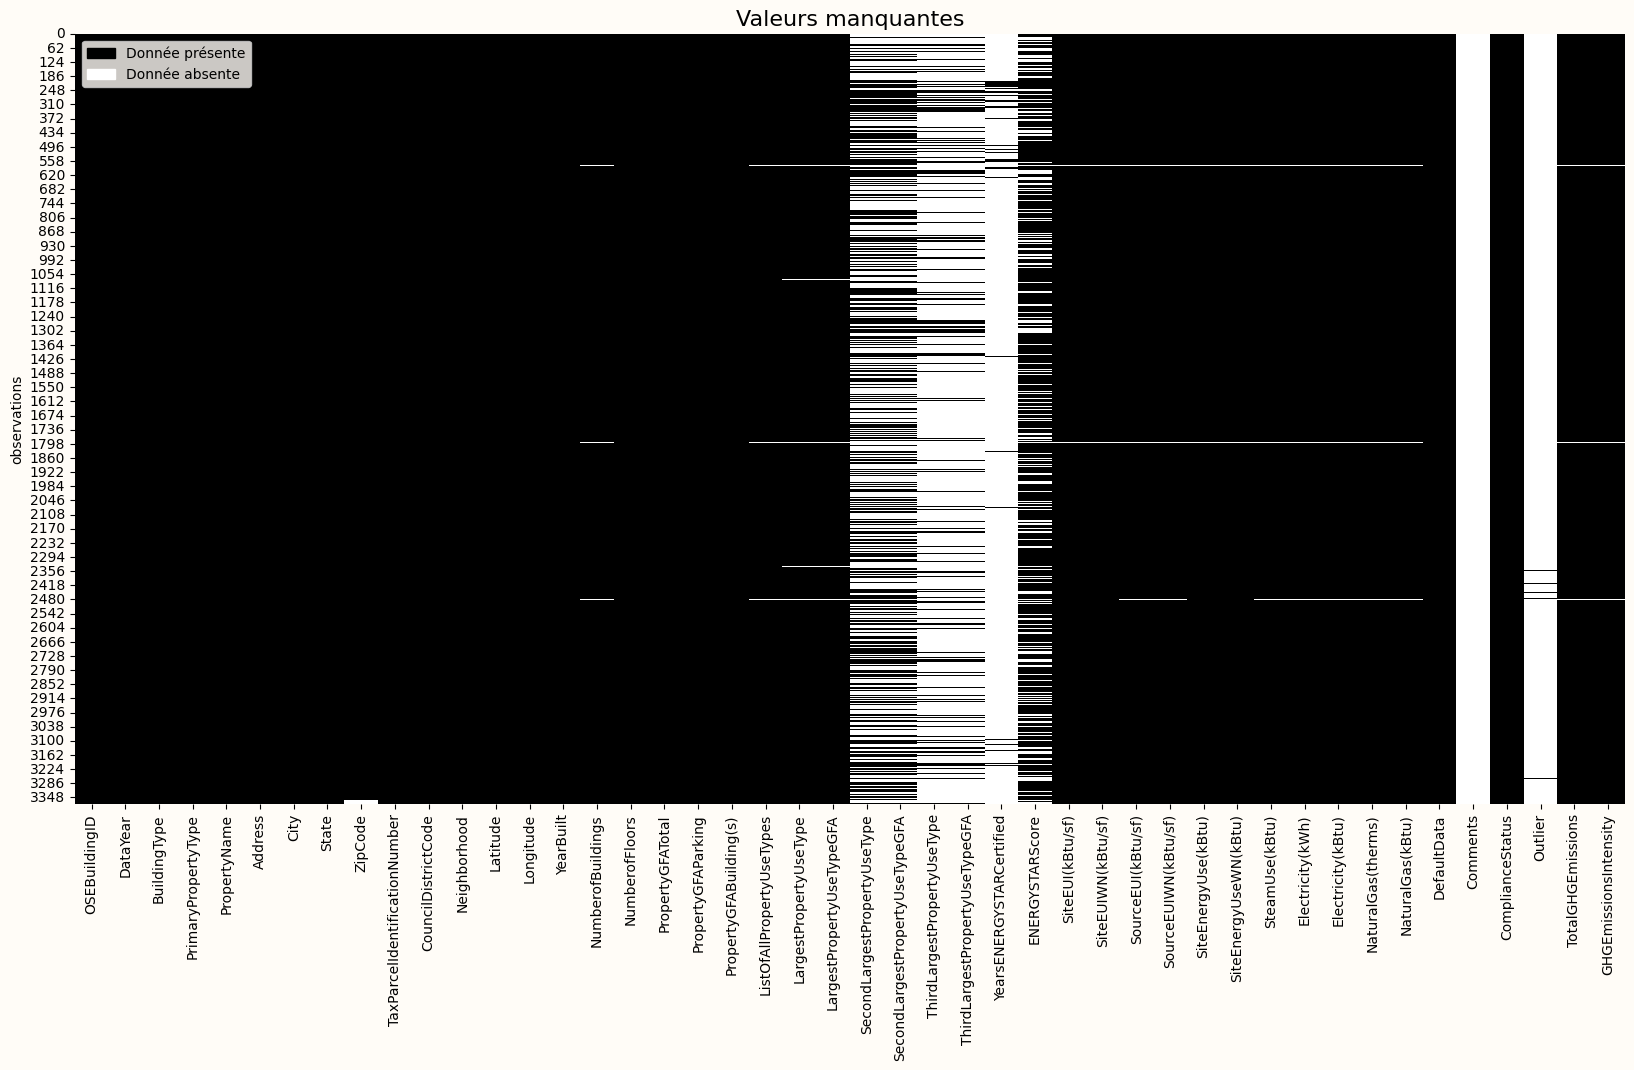

In [135]:
generate_matrix_na(df, "matrix_na")

In [136]:
# Taux de valeurs manquantes par variable
round(df.isna().mean().sort_values(ascending=False) * 100, 2)

Comments                           100.00
Outlier                             99.05
YearsENERGYSTARCertified            96.48
ThirdLargestPropertyUseType         82.35
ThirdLargestPropertyUseTypeGFA      82.35
SecondLargestPropertyUseType        50.27
SecondLargestPropertyUseTypeGFA     50.27
ENERGYSTARScore                     24.97
LargestPropertyUseTypeGFA            0.59
LargestPropertyUseType               0.59
ZipCode                              0.47
ListOfAllPropertyUseTypes            0.27
SourceEUIWN(kBtu/sf)                 0.27
SourceEUI(kBtu/sf)                   0.27
Electricity(kWh)                     0.27
Electricity(kBtu)                    0.27
NaturalGas(therms)                   0.27
NaturalGas(kBtu)                     0.27
TotalGHGEmissions                    0.27
SteamUse(kBtu)                       0.27
GHGEmissionsIntensity                0.27
NumberofBuildings                    0.24
SiteEUI(kBtu/sf)                     0.21
SiteEUIWN(kBtu/sf)                

## <a id='toc5_3_'></a>[Valeurs dupliquées](#toc0_)

En vérifiant les valeurs dupliquées, nous remarquons que seuls les identifiants des propriétés sont uniques, le reste des variables peuvent prendre des valeurs identiques ce qui semble cohérent.

In [137]:
# Vérification de l'unicité des valeurs pour chaque variables
for col in df.columns:
    if df[col].duplicated().sum() <= 0:
        print(col)

OSEBuildingID


# <a id='toc6_'></a>[6 - Traitement et nettoyage préliminaire](#toc0_)

## <a id='toc6_1_'></a>[Filtrage par type de propriétés](#toc0_)

L'objet de notre travail de prédiction sont les propriétés non destinés à l'habitation.

Les types de propriétés du dataset sont les suivants :

- `NonResidential`
- `Nonresidential COS`
- `Multifamily MR (5-9)`
- `SPS-District K-12`
- `Campus`
- `Multifamily LR (1-4)`
- `Multifamily HR (10+)`
- `Nonresidential WA`

Nous allons donc filtrer les données pour ne conserver que les types : `NonResidential`, `Nonresidential COS`, `SPS-District K-12`, `Campus` et `Nonresidential WA`.

Ceci nous amène à un dataset intermédiaire de 1629 observations.

In [138]:
# Écarter les propriétés résidentiels
features_object = df.select_dtypes("object").columns
df = df.loc[~df[features_object].apply(lambda x: x.str.contains('Multifamily')).any(axis=1)]
df.shape

(1629, 46)

In [139]:
# Les différents types de propriétés et leur type principal
df.groupby(["BuildingType", "PrimaryPropertyType"])["OSEBuildingID"].count()

BuildingType        PrimaryPropertyType        
Campus              K-12 School                      4
                    Large Office                     1
                    Mixed Use Property               3
                    Other                            7
                    Restaurant                       1
                    University                       6
NonResidential      Distribution Center             51
                    Hospital                        10
                    Hotel                           76
                    K-12 School                     39
                    Laboratory                      10
                    Large Office                   165
                    Medical Office                  38
                    Mixed Use Property              79
                    Other                          184
                    Refrigerated Warehouse          12
                    Residence Hall                  21
                 

La variable `ComplianceStatus` indique si un propriété satisfait aux exigences d'analyse comparative énergétique pour l'année de déclaration en cours. Nous allons donc nous fier uniquement au observations conforment aux exigences de saisie d'informationx attendues.

In [140]:
mask = df["ComplianceStatus"].isin(["Compliant"])
df = df[mask]
df.shape

(1510, 46)

## <a id='toc6_2_'></a>[Traitement des valeurs manquantes](#toc0_)

### <a id='toc6_2_1_'></a>[• Variables sur-impactées par les NaN](#toc0_)

Certaines variables présentent un taux de valeurs manquantes extrêment élevé (> 90%), nous allons simplement ignorer ces variables.

In [141]:
# Filtrage des colonnes où la proportion de valeurs nulles est supérieure à 90%
not_relevant_features = df.isna().mean()[df.isna().mean() >= 0.9].index
df.drop(not_relevant_features, axis=1, inplace=True)

### <a id='toc6_2_2_'></a>[• Les codes postaux](#toc0_)

Certains codes postaux sont absents. Nous les mettons à jour manuellement en nous basant sur l'adresse.

In [142]:
zipcode_data = {
    50196: 98125,
    50198: 98144,
    50201: 98117,
    50204: 98125,
    50207: 98107,
    50208: 98117,
    50210: 98119,
    50212: 98112,
    50219: 98122,
    50220: 98118,
    50221: 98126,
    50222: 98108,
    50223: 98104,
    50224: 98119,
    50225: 98108,
    50226: 98108
}

for id, code in zipcode_data.items():
    df.loc[df["OSEBuildingID"] == id, "ZipCode"] = code

### <a id='toc6_2_3_'></a>[• L'usage principal des propriétés](#toc0_)

Il manque, pour 4 observations, la surface et le type d'usage principal. Ces observations sont retirées du dataset pour éviter au maximum les modifications qui pourraient avoir un impact sur les modèles testés ultérieurement.

(NB : il s'avère qu'effectivement, la suppression de ces 4 observations permet d'obtenir de meilleures prédictions que si elles avaient été imputées)

In [143]:
mask = \
    (df["LargestPropertyUseType"].isna()) & \
    (df["LargestPropertyUseTypeGFA"].isna())

display(df[mask]) # contrôle des données avant traitement

indexes_to_update = df[mask].index

df.drop(indexes_to_update, inplace=True)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
353             496      2016  NonResidential        Self-Storage Facility   
1147          21103      2016  NonResidential                        Hotel   
2414          25568      2016  NonResidential  Small- and Mid-Sized Office   
2459          25711      2016  NonResidential                   Restaurant   

                          PropertyName                Address     City State  \
353                   Market St Center  2811 NW Market Street  Seattle    WA   
1147                   Palladian Hotel     2000 Second Avenue  Seattle    WA   
2414               Talon Northlake LLC   1341 N Northlake Way  Seattle    WA   
2459  BUSH GARDEN - RESTURANT & LOUNGE    614 S MAYNARD AVE S  Seattle    WA   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
353   98107.0                    1175001235                    6      BALLARD   
1147  98121.0                    1977201140                    7     DOWNTOWN   
2414  98103.0                    4088804565                    4   LAKE UNION   
2459  98104.0                    5247802410                    2     DOWNTOWN   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
353   47.66838 -122.39310       1946                2.0               2   
1147  47.61203 -122.34165       1910                1.0               8   
2414  47.64747 -122.34086       2008                1.0               4   
2459  47.59697 -122.32474       1913                1.0               3   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
353             111445                   0                  111445   
1147             61721                   0                   61721   
2414             48350                   0                   48350   
2459             28800                   0                   28800   

                              ListOfAllPropertyUseTypes  \
353   Fitness Center/Health Club/Gym, Office, Other ...   
1147                                              Hotel   
2414                                             Office   
2459                                         Restaurant   

     LargestPropertyUseType  LargestPropertyUseTypeGFA  \
353                     NaN                        NaN   
1147                    NaN                        NaN   
2414                    NaN                        NaN   
2459                    NaN                        NaN   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
353                           NaN                              NaN   
1147                          NaN                              NaN   
2414                          NaN                              NaN   
2459                          NaN                              NaN   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
353                          NaN                             NaN   
1147                         NaN                             NaN   
2414                         NaN                             NaN   
2459                         NaN                             NaN   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
353               NaN         47.799999           51.000000   
1147             93.0         52.200001           53.500000   
2414             45.0         72.199997           74.699997   
2459              NaN         31.200001           32.500000   

      SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
353           103.000000            106.400002         5.697472e+06   
1147          150.399994            154.399994         2.897080e+06   
2414          226.600006            234.600006         3.168131e+06   
2459           62.000000             62.799999         8.999242e+05   

      SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
353            6.076957e+06             0.0       881452.0000   


### <a id='toc6_2_4_'></a>[• L'usage secondaire et teriaire des propriétés](#toc0_)

Il est naturel d'observer des valeurs manquantes pour les usages secondaires et tertiaires des propriétés, étant donné qu'un propriété peut se définir par un seul usage principal. Par conséquent, les informations concernant les types d'usage secondaire et tertiaire, ainsi que leurs superficies associées, peuvent être absentes.

Cependant nous allons remplacer les valeurs numériques manquantes par 0 et les valeurs qualitatives manquantes par "None"

In [144]:
subset = ["SecondLargestPropertyUseType", "ThirdLargestPropertyUseType"]
replace_na_by_value(df, subset, "Unknown")

subset = ["SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseTypeGFA"]
replace_na_by_value(df, subset, 0)

### <a id='toc6_2_5_'></a>[• La consommation en énergie](#toc0_)

Certaines valeurs de consommation énergétique sont absentes, nous allons les remplacer par la valeur zéro

In [145]:
subset = ["SiteEUI(kBtu/sf)", "SiteEUIWN(kBtu/sf)", "SiteEnergyUseWN(kBtu)"]
replace_na_by_value(df, subset, 0)

## <a id='toc6_3_'></a>[Traitement des valeurs négatives](#toc0_)

Il existe une observation pour laquelle certaines valeurs de consommation d'énergie et d'émission de GES sont négatives. Les valeurs étant incohérentes nous retirons cette observation du jeu de données.

In [146]:
check_negative_values(df)

Variables avec des valeurs négatives :
______________________________________
Longitude : 1506
SourceEUIWN(kBtu/sf) : 1
Electricity(kWh) : 1
Electricity(kBtu) : 1
TotalGHGEmissions : 1
GHGEmissionsIntensity : 1


In [147]:
mask = \
    (df["SourceEUIWN(kBtu/sf)"] < 0) | \
    (df["Electricity(kWh)"] < 0) | \
    (df["Electricity(kBtu)"] < 0) | \
    (df["TotalGHGEmissions"] < 0) | \
    (df["GHGEmissionsIntensity"] < 0)

rows = df.loc[mask]
display(rows)

df.drop(rows.index, inplace=True)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3206          49784      2016  NonResidential  Small- and Mid-Sized Office   

        PropertyName              Address     City State  ZipCode  \
3206  Bullitt Center  1501 E. Madison St.  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  \
3206                    7234600195                    3      CENTRAL   

      Latitude  Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
3206  47.61432 -122.31257       2013                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3206             52000                   0                   52000   

     ListOfAllPropertyUseTypes LargestPropertyUseType  \
3206                    Office                 Office   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3206                    48159.0                      Unknown   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3206                              0.0                     Unknown   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3206                             0.0            100.0               7.1   

      SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
3206                 5.0                 2.0                  -2.1   

      SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
3206          342726.0938            240132.0938             0.0   

      Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
3206      -33826.80078          -115417.0                 0.0   

      NaturalGas(kBtu)  DefaultData ComplianceStatus  TotalGHGEmissions  \
3206               0.0        False        Compliant               -0.8   

      GHGEmissionsIntensity  
3206                  -0.02

## <a id='toc6_4_'></a>[Remplacement de valeurs](#toc0_)

Nous remarquons que pour la variable `Neighborhoods` plusieurs saisies peuvent se référer à un même quartier. Nous corrigeons donc ces mauvaises saisies en ramenant tout en majuscule. 

Nous corrigeons aussi l'unique saisie posant problème pour le quartier "DELRIDGE NEIGHBOHOODS"

In [148]:
# Conversion des valeurs de la variable "Neighborhood" en majuscule
df["Neighborhood"] = df["Neighborhood"].str.upper()

# Correction pour la valeur "DELRIDGE"
df.loc[df["Neighborhood"].str.contains("DELRIDGE"), "Neighborhood"] = "DELRIDGE"

# <a id='toc7_'></a>[7 - Analyse exploratoire univariée](#toc0_)

## <a id='toc7_1_'></a>[Target (variable cible)](#toc0_)

Un premier aperçu de la target montre une dispersion très large au vue de la valeur de l'écart-type (789.64) et la médiane (49.90).

Nous constatons aussi la présence de valeurs extrêmes ou atypiques, la valeur de 16870.98 renforce cette hypothèse. Il s'avère que cette variable de notre DataFrame actuel possède 166 outliers.

In [149]:
feature_target = "TotalGHGEmissions"
feature_target_label = "Émission (kg CO2e/MBtu)"

## A décommenter s'il faut anlyser la deuxième target 
# feature_target = "SiteEnergyUse(kBtu)"
# feature_target_label = "Consommation en énergie (kBtu)"


In [150]:
# Résumé statistiques de la target
df[feature_target].describe()

count     1505.000000
mean       196.166777
std        789.643248
min          0.000000
25%         20.640000
50%         49.900000
75%        147.490000
max      16870.980000
Name: TotalGHGEmissions, dtype: float64

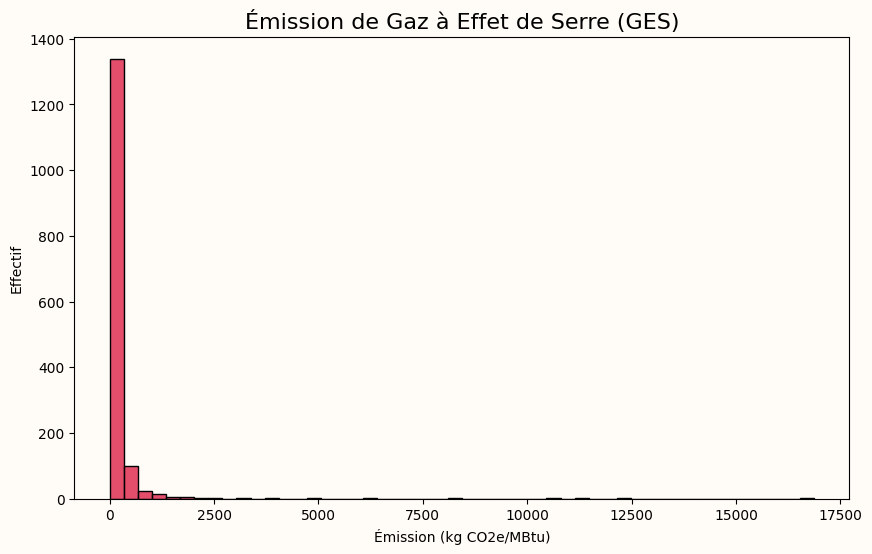

In [151]:
# Visualisation de la distribution des émissions de GES
generate_histplot(
    df, 
    feature_target, 
    "Émission de Gaz à Effet de Serre (GES)", 
    feature_target_label, 
    "Effectif", 
    feature_target.lower(), 
    color="crimson"
)

In [152]:
# Comptage des outliers pour la target
check_outliers(df, feature_target)

Liste des variables numériques et leur nombre d'outliers
_________________________________________________________
TotalGHGEmissions : 166


## <a id='toc7_2_'></a>[Les types de propriétés](#toc0_)

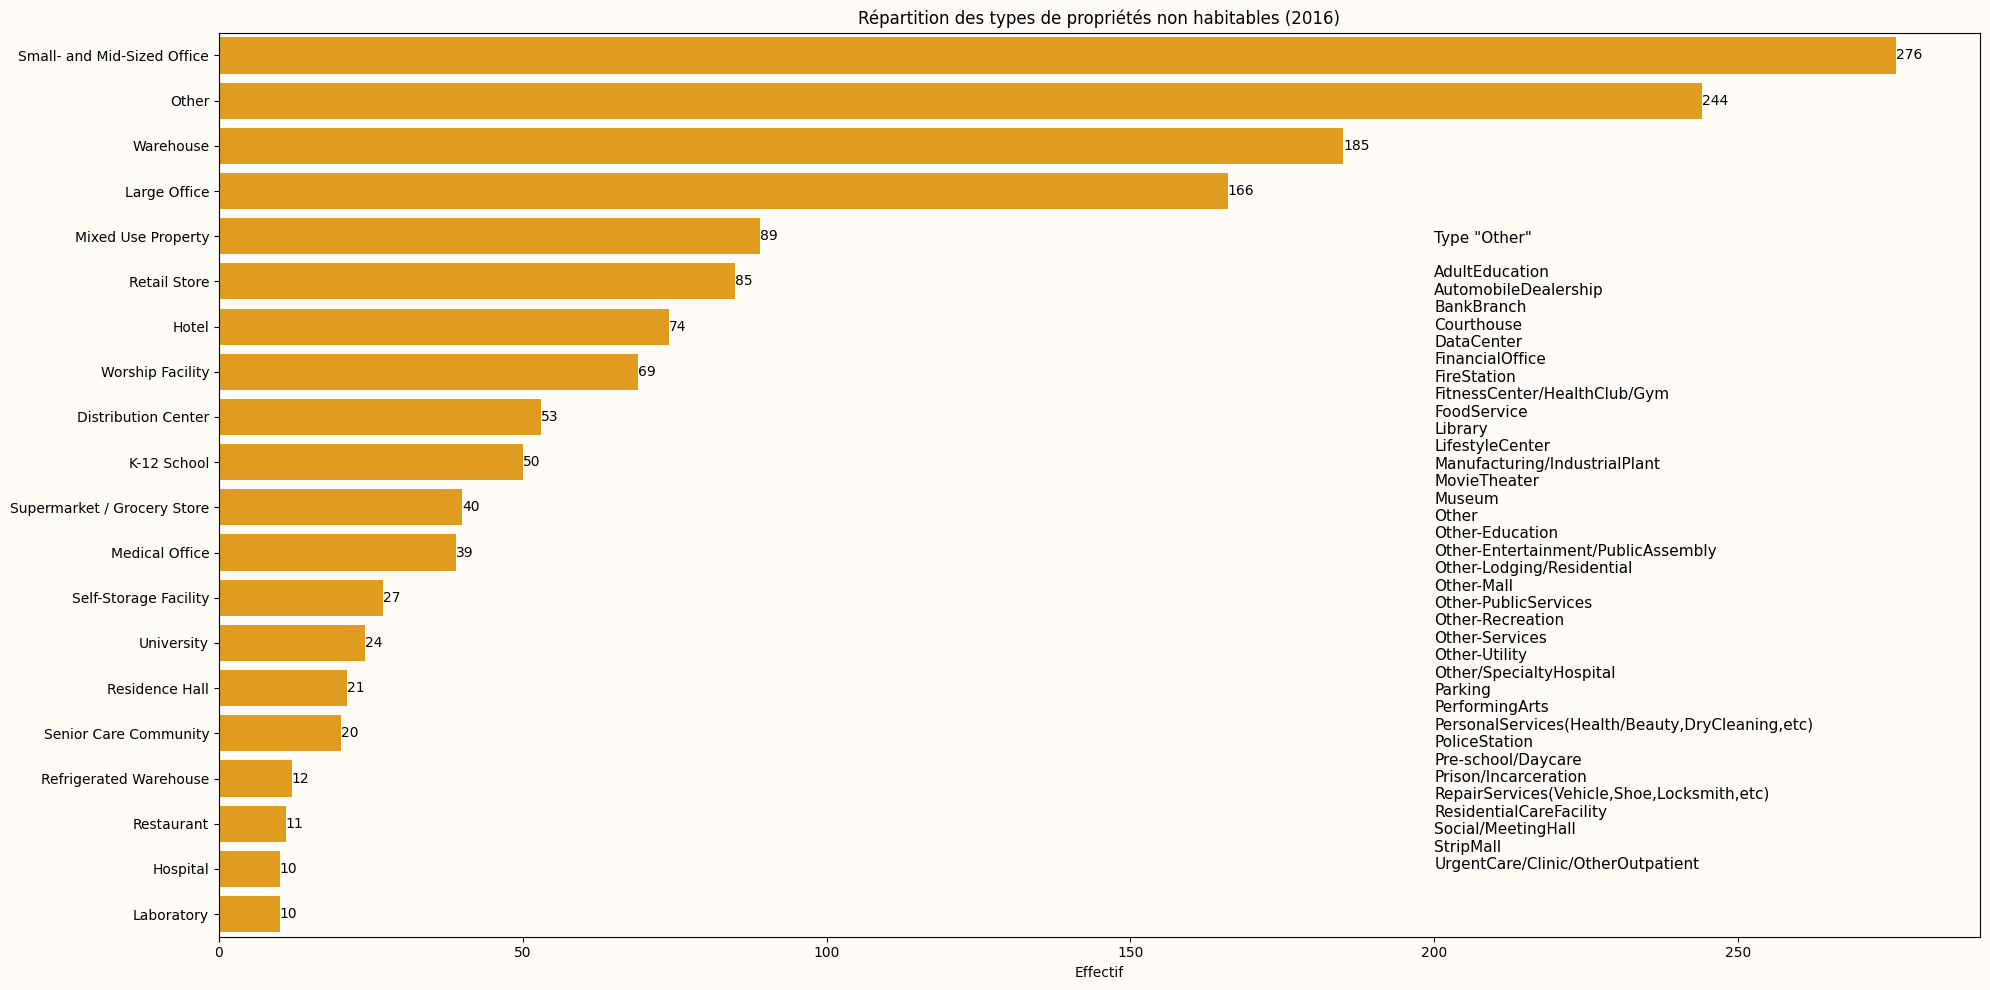

In [153]:
others = str(df[df["PrimaryPropertyType"] == "Other"]["LargestPropertyUseType"].sort_values().unique())
others = others.replace("' '", "\n").replace("[", "").replace("]", "").replace("'", "").replace(" ", "")

indexes = df["PrimaryPropertyType"].value_counts().index
values = df["PrimaryPropertyType"].value_counts().values

plt.figure(figsize=(20, 10))
ax = sns.barplot(x=values, y=indexes, color="Orange")
ax.set_title("Répartition des types de propriétés non habitables (2016)")
ax.set_xlabel("Effectif")
ax.set_ylabel("")
ax.bar_label(ax.containers[0])
ax.text(200, 18, f"Type \"Other\"\n\n{others}", fontsize=11)

plt.tight_layout()
ax.figure.savefig("../images/barplot_primary_property_type")

In [154]:
# Proportion de chaque type de propriétés en %
df["PrimaryPropertyType"].value_counts(normalize=True) * 100

PrimaryPropertyType
Small- and Mid-Sized Office    18.338870
Other                          16.212625
Warehouse                      12.292359
Large Office                   11.029900
Mixed Use Property              5.913621
Retail Store                    5.647841
Hotel                           4.916944
Worship Facility                4.584718
Distribution Center             3.521595
K-12 School                     3.322259
Supermarket / Grocery Store     2.657807
Medical Office                  2.591362
Self-Storage Facility           1.794020
University                      1.594684
Residence Hall                  1.395349
Senior Care Community           1.328904
Refrigerated Warehouse          0.797342
Restaurant                      0.730897
Hospital                        0.664452
Laboratory                      0.664452
Name: proportion, dtype: float64

## <a id='toc7_3_'></a>[Localisation des propriétés](#toc0_)

### <a id='toc7_3_1_'></a>[Coordonnées géographiques](#toc0_)

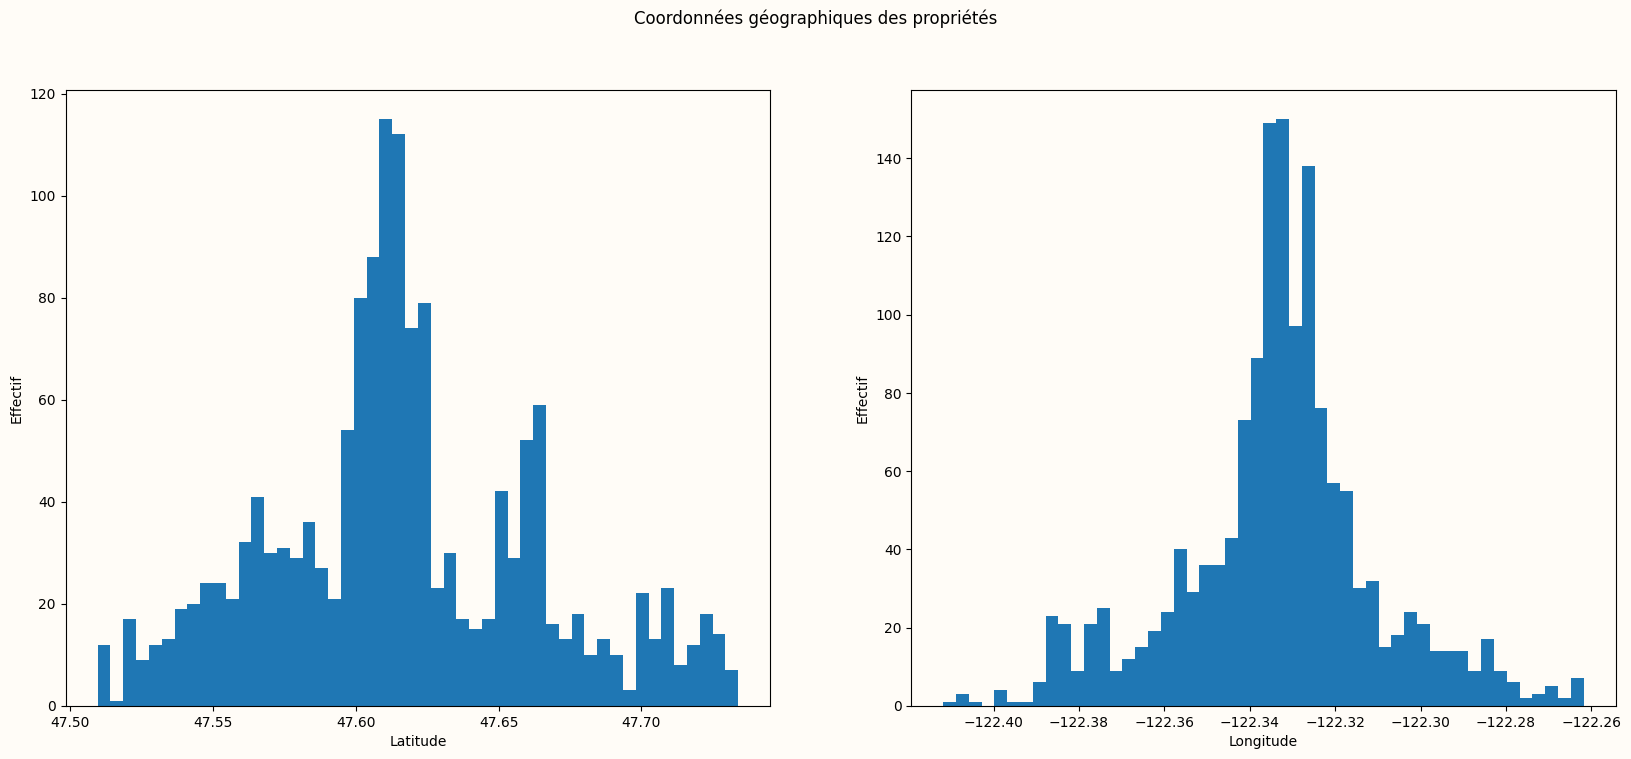

In [155]:
features_location = ["Latitude", "Longitude"]


# Création de la figure et des axes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Latitude
axes[0].hist(df["Latitude"], bins=50)
axes[0].set_xlabel("Latitude")
axes[0].set_ylabel("Effectif")

# Longitude
axes[1].hist(df["Longitude"], bins=50)
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Effectif")


fig.suptitle("Coordonnées géographiques des propriétés")

plt.show()

### <a id='toc7_3_2_'></a>[Map](#toc0_)

In [156]:
import folium

map = folium.Map(
    location=[df['Latitude'].mean(), df['Longitude'].mean()],
    zoom_start=13
)

for i in range(0,len(df)):

    # Construction du contenu HTML du popup
    popup_content = f"""
    <div style="text-align:left;"><b>Nom :</b> {df.iloc[i]['PropertyName']}</div>
    <div style="text-align:left;"><b>Adresse :</b> {df.iloc[i]['Address']}</div>
    """
    
    # Création du popup avec le contenu HTML
    popup = folium.Popup(folium.Html(popup_content, script=True), max_width=300)

    folium.Circle(
        [df.iloc[i]['Latitude'],df.iloc[i]['Longitude']],
        popup=popup, 
        radius=4,
        color="red",
        fill=True,
        fill_opacity=0.2,
    ).add_to(map)

# Ajout d'un titre en utilisant un élément HTML
titre_html = '''
             <h3 align="center" style="font-size:20px"><b>Répartition des propriétés dans la ville</b></h3>
             '''
map.get_root().html.add_child(folium.Element(titre_html))

map

### <a id='toc7_3_3_'></a>[Répartition par quartier](#toc0_)

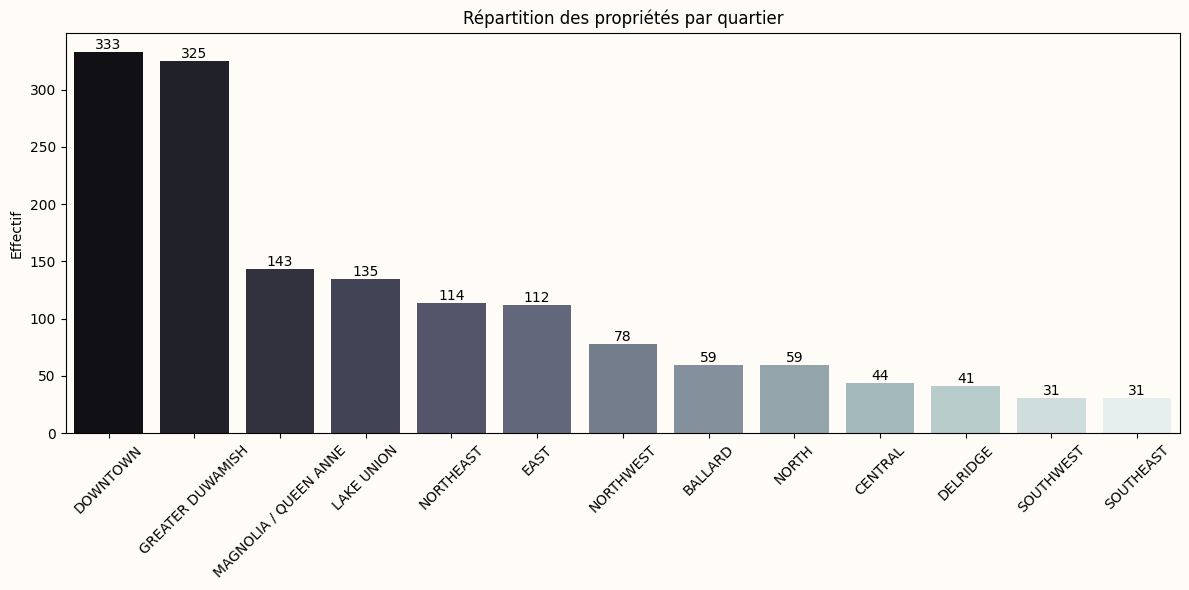

In [157]:
neighborhoods = df["Neighborhood"].value_counts()

generate_barplot(
    figsize=(12, 6),
    x_values=neighborhoods.index, 
    y_values=neighborhoods.values, 
    title="Répartition des propriétés par quartier", 
    y_label="Effectif", 
    palette="bone", 
    hue=neighborhoods.index
)

### <a id='toc7_3_4_'></a>[Âges](#toc0_)

La distribution n'est pas uniforme ni lisse. Il y a de fréquentes fluctuations dans le nombre de propriétés d'un intervalle d''année à l'autre.

Les pics et creux pourraient suggérer des cycles de construction ou des périodes de développement économique ou d'investissement dans l'immobilier.

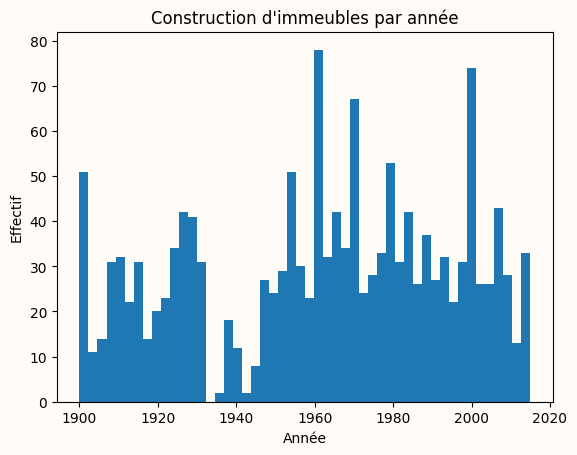

In [158]:
# Visualisation de la distribution des années de construction
ax = df["YearBuilt"].hist(bins=50, grid=False)
ax.set_title("Construction d'immeubles par année")
ax.set_ylabel("Effectif")
ax.set_xlabel("Année")

plt.show()

## <a id='toc7_4_'></a>[Configuration des propriétés](#toc0_)

La majorité des propriétés sont composées d'un unique bâtiment (93%) de un à trois étages (66%).

In [159]:
features_property_configuration = ["NumberofBuildings", "NumberofFloors"]

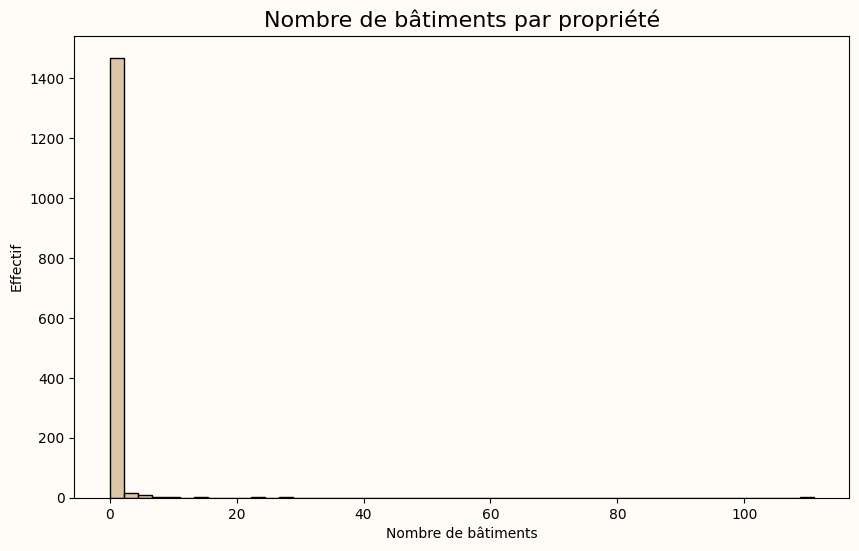

Taux des propriétés à un seul bâtiment : 93 %


In [160]:
feature = features_property_configuration[0]

# Visualisation des nombres de bâtiment
generate_histplot(
    df, 
    feature, 
    "Nombre de bâtiments par propriété", 
    "Nombre de bâtiments", 
    "Effectif", 
    feature.lower(), 
    color="tan"
)

# Taux des propriétés à 1 bâtiment
unique_building_rate = round((df[feature] == 1).sum() / df.shape[0] * 100)
print(f"Taux des propriétés à un seul bâtiment : {unique_building_rate} %")

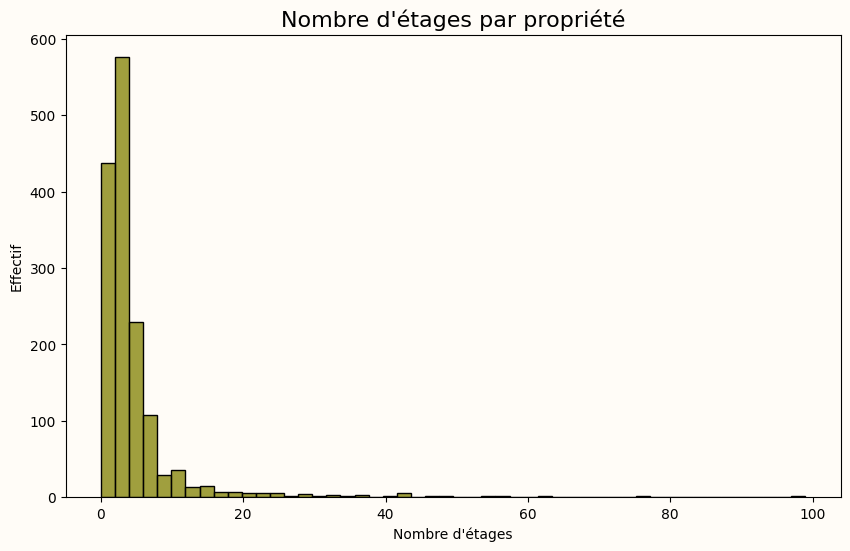

In [161]:
feature = features_property_configuration[1]

# Visualisation des nombres d'étages
generate_histplot(
    df, 
    feature, 
    "Nombre d'étages par propriété", 
    "Nombre d'étages", 
    "Effectif", 
    feature.lower(),
    color="olive"
)

In [162]:
# Taux de bâtiments ayant de 1 à 3 étages
rate = 0
min_floors = 1
max_floors = 3
for nb_floors in range(min_floors, max_floors + 1):
    nb_floors_rate = round((df[feature] == nb_floors).sum() / df.shape[0] * 100)
    rate = rate + nb_floors_rate
print(f"Bâtiment ayant {min_floors} à {max_floors} étage(s) : {rate} %")

Bâtiment ayant 1 à 3 étage(s) : 66 %


## <a id='toc7_5_'></a>[Surfaces au sol](#toc0_)

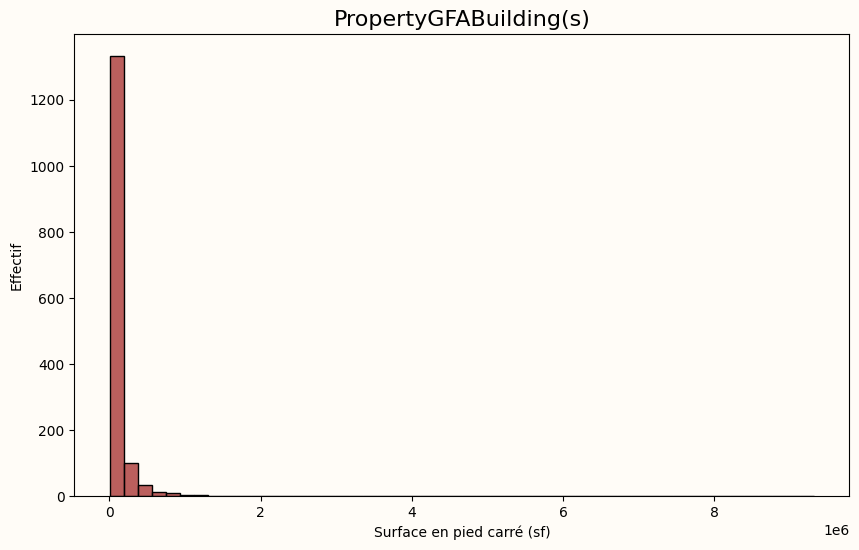

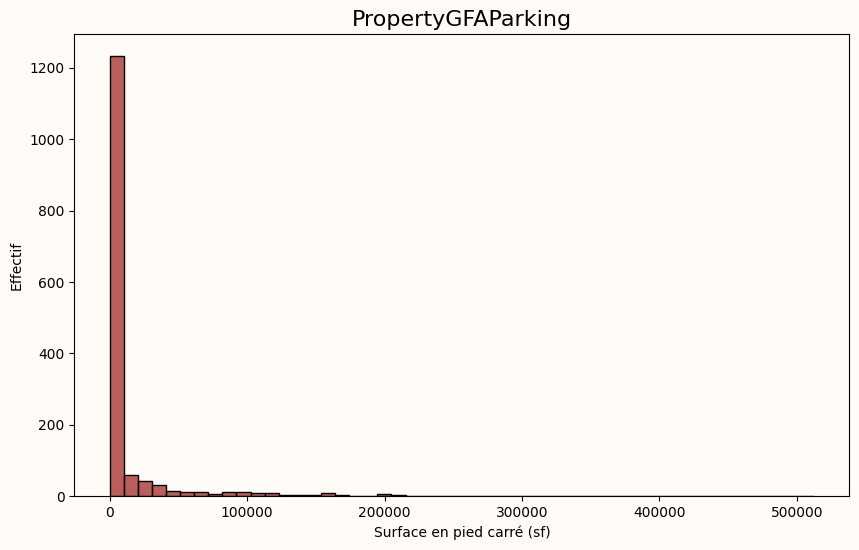

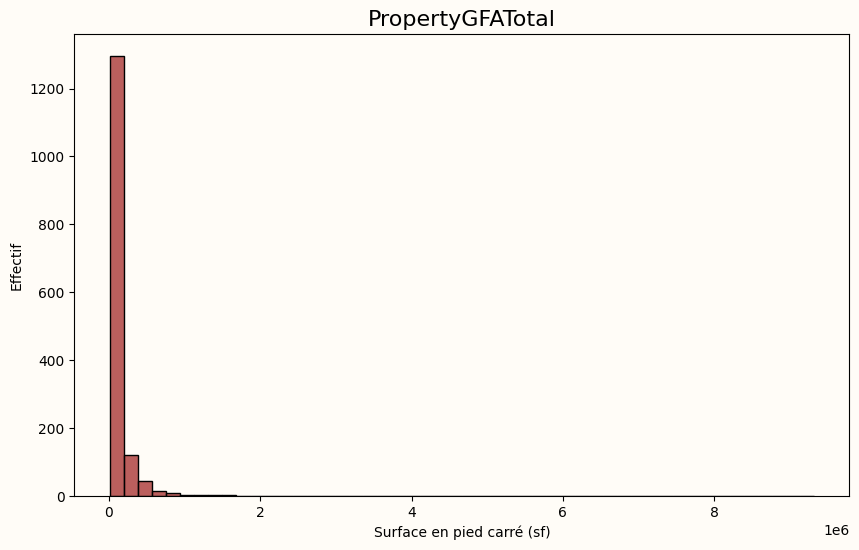

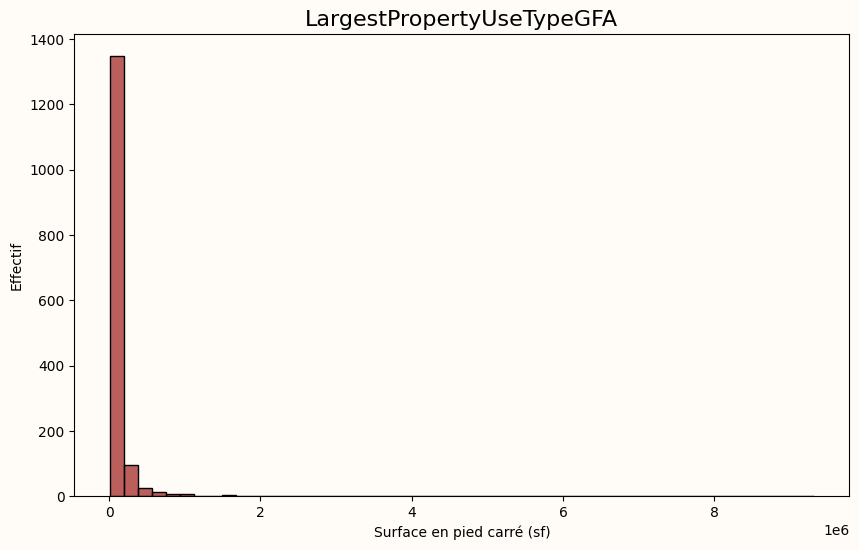

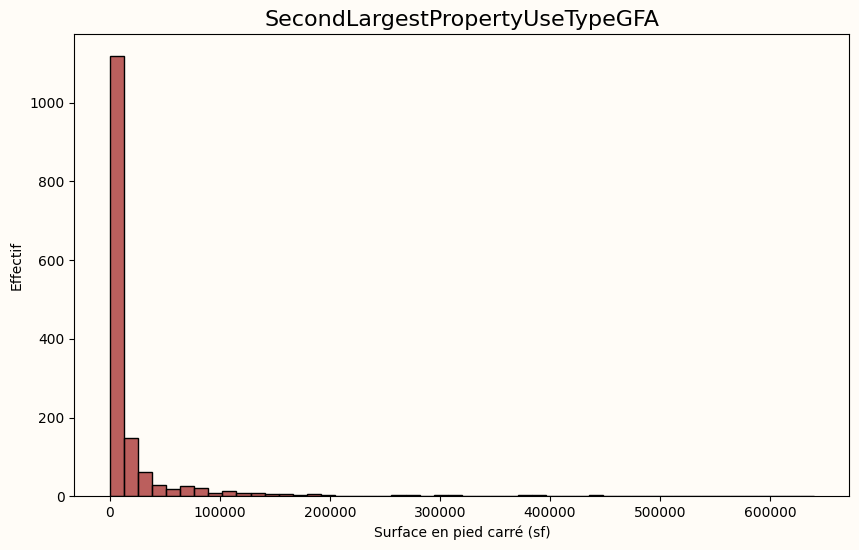

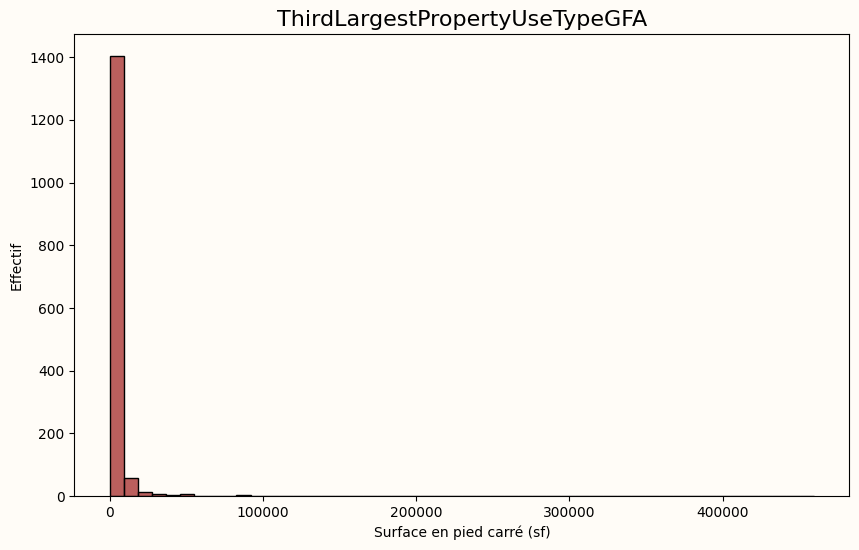

In [163]:
features_gfa = [
    "PropertyGFABuilding(s)",
    "PropertyGFAParking",
    "PropertyGFATotal",
    "LargestPropertyUseTypeGFA",
    "SecondLargestPropertyUseTypeGFA",
    "ThirdLargestPropertyUseTypeGFA"
]

for feature in features_gfa:
    # Visualisation de la distribution de surfaces des propriétés
    generate_histplot(
        df, 
        feature, 
        feature, 
        "Surface en pied carré (sf)", 
        "Effectif", 
        feature.lower(),
        color="brown"
    )

## <a id='toc7_6_'></a>[Indicateurs énergétiques](#toc0_)

In [164]:
df["ENERGYSTARScore"].describe()

count    983.000000
mean      63.544252
std       28.821627
min        1.000000
25%       44.000000
50%       71.000000
75%       88.000000
max      100.000000
Name: ENERGYSTARScore, dtype: float64

## <a id='toc7_7_'></a>[Consommation d'énergie](#toc0_)

### <a id='toc7_7_1_'></a>[Consommation par type d'énergie](#toc0_)

L'électricité est la source d'énergie principale.

In [165]:
features_energy_types = [
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "SteamUse(kBtu)"
]

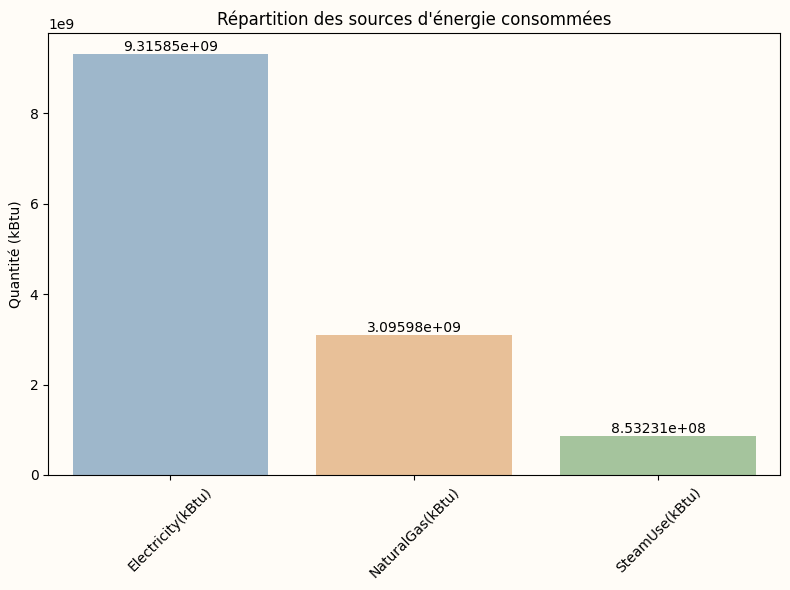

In [166]:
energy_types = []
energy_values = []
for feature in features_energy_types:
    energy_types.append(feature)
    energy_values.append(df[feature].sum())

colors = ['#97b8d2', '#f5c08b', '#a1cb96']

# Visualisation de la répartition des sources d'énergie
generate_barplot(
    figsize=(8, 6),
    x_values=energy_types, 
    y_values=energy_values, 
    title="Répartition des sources d'énergie consommées", 
    y_label="Quantité (kBtu)", 
    palette=colors, 
    hue=energy_types
)

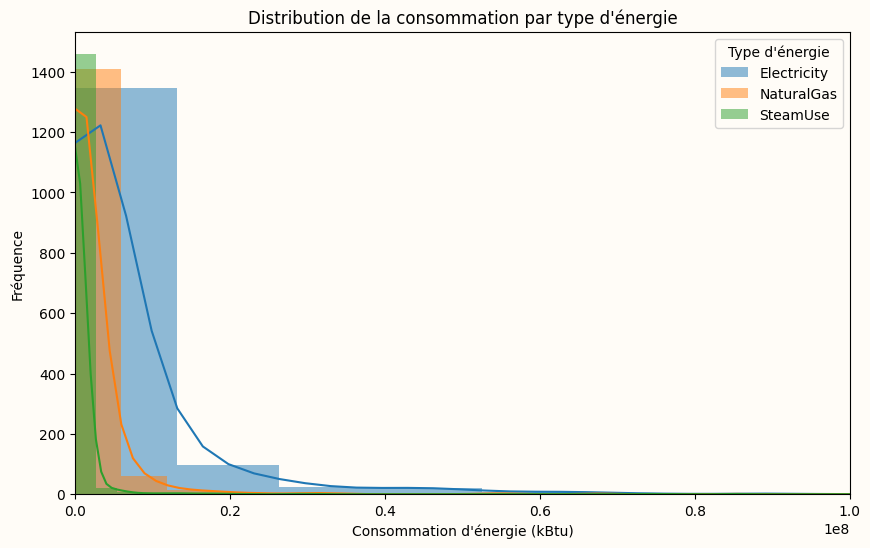

In [167]:
# Visualisation de la consommation énergétique par type d'énergie
plt.figure(figsize=(10, 6))

for feature in features_energy_types:
    sns.histplot(df[feature], kde=True, bins=50, label=feature.split('(')[0], edgecolor=None)

plt.legend(title="Type d'énergie")
plt.xlabel("Consommation d'énergie (kBtu)")
plt.ylabel("Fréquence")
plt.title("Distribution de la consommation par type d'énergie")
plt.xlim(0, 100 * 10 **6)
plt.show()

### <a id='toc7_7_2_'></a>[Consommation sur site et de la consommation depuis la source d'énergie](#toc0_)

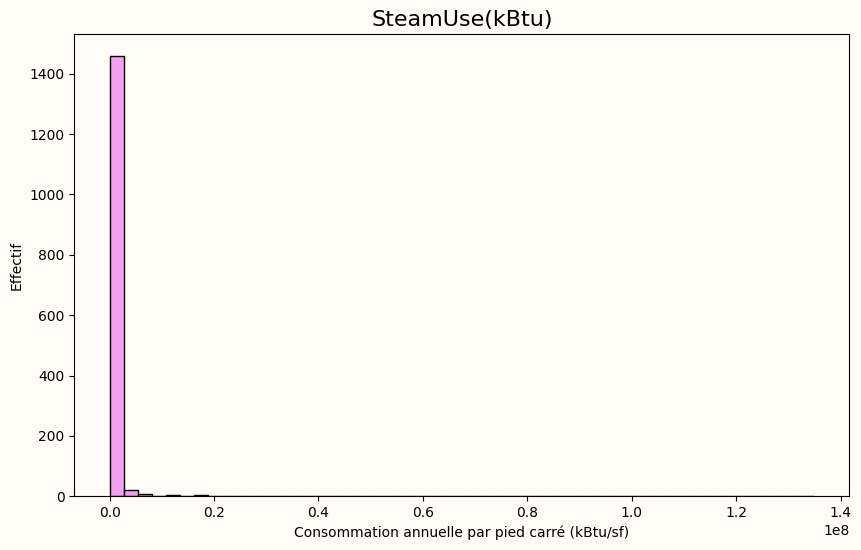

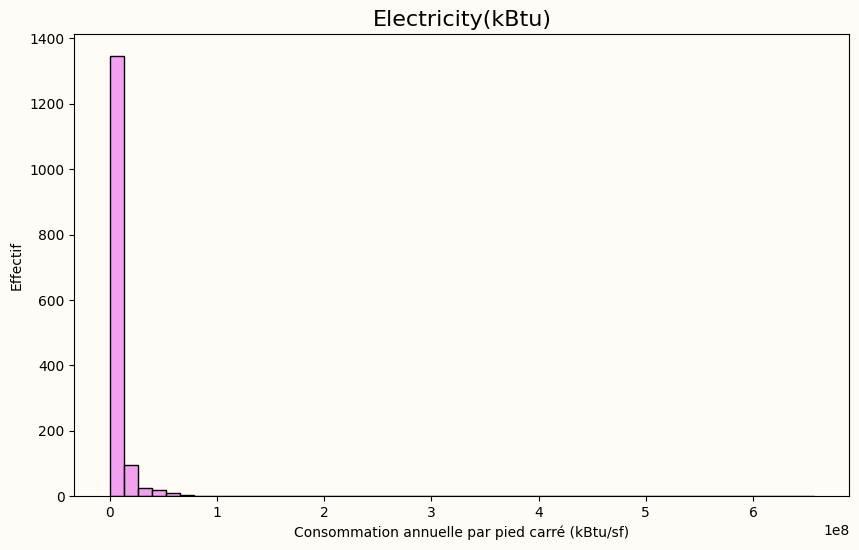

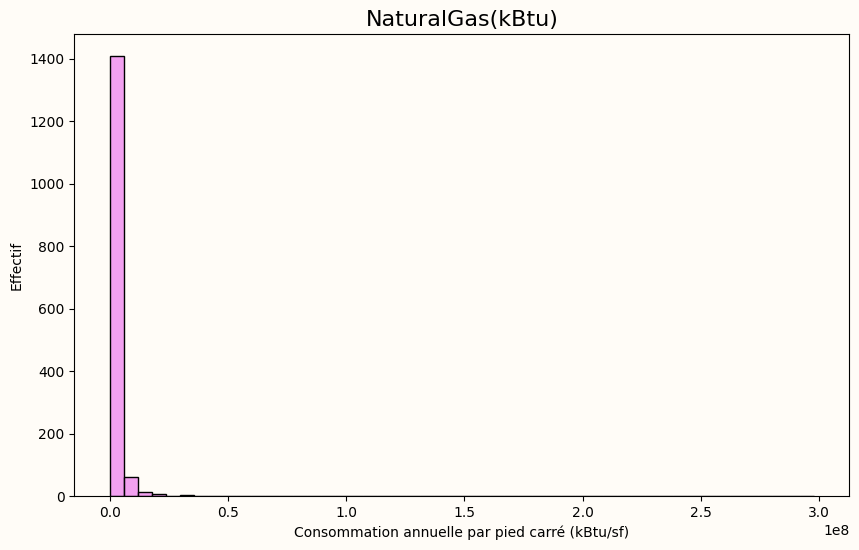

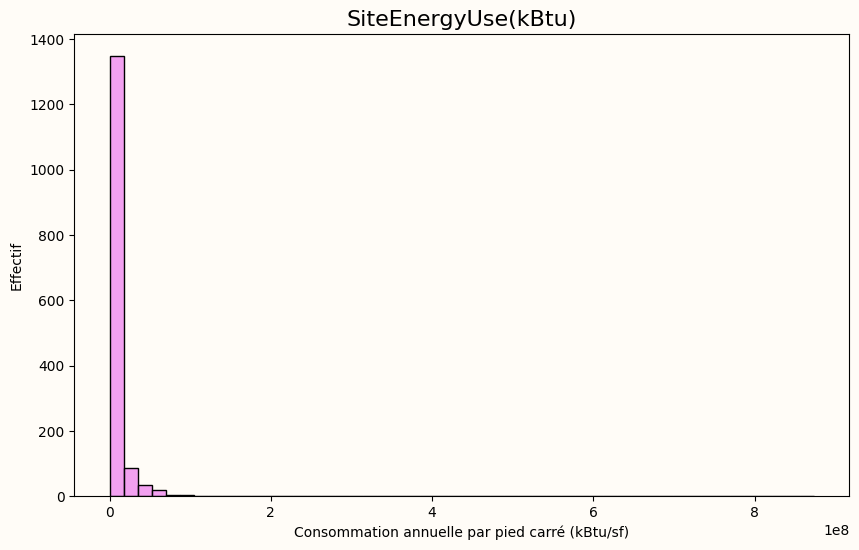

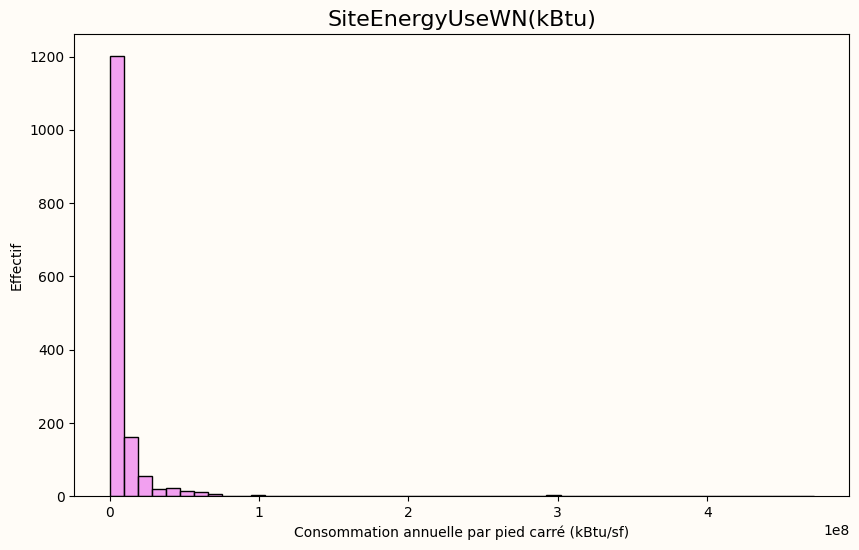

In [168]:
features_energy_types_use = [
    "SteamUse(kBtu)",
    "Electricity(kBtu)",
    "NaturalGas(kBtu)",
    "SiteEnergyUse(kBtu)",
    "SiteEnergyUseWN(kBtu)"
]

for feature in features_energy_types_use:
    generate_histplot(
        df, 
        feature, 
        feature, 
        "Consommation annuelle par pied carré (kBtu/sf)", 
        "Effectif", 
        feature.lower(),
        color="violet"
    )

### <a id='toc7_7_3_'></a>[Intensité de la consommation sur site et de la consommation depuis la source d'énergie](#toc0_)

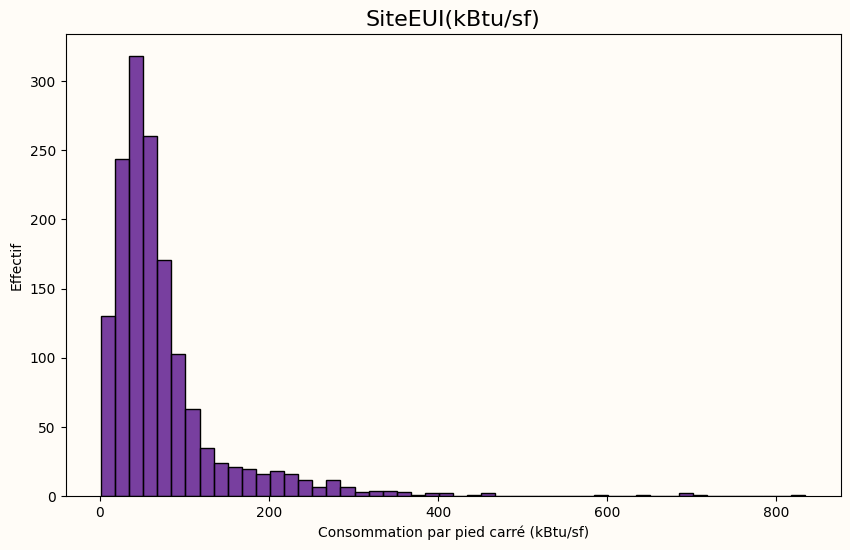

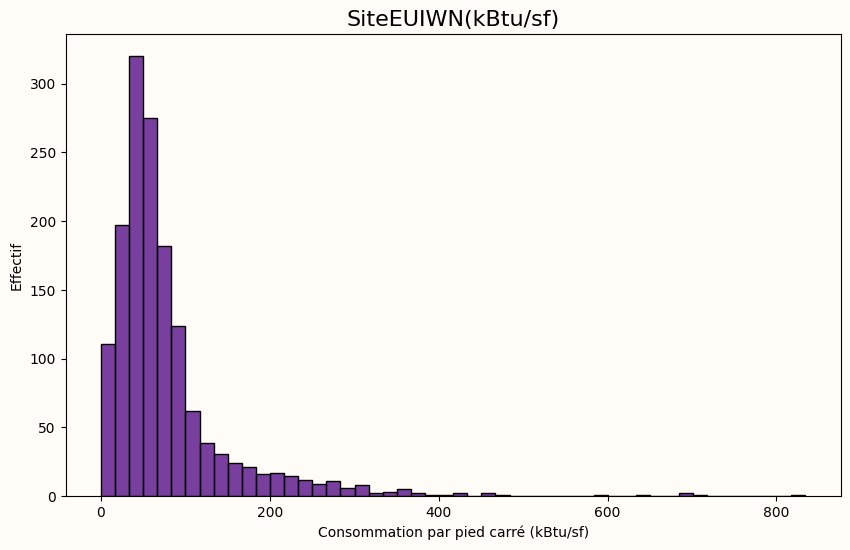

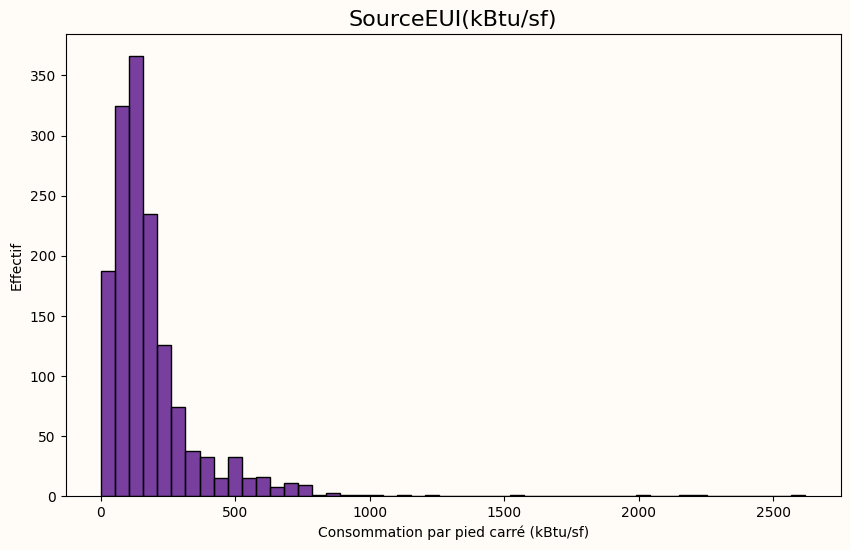

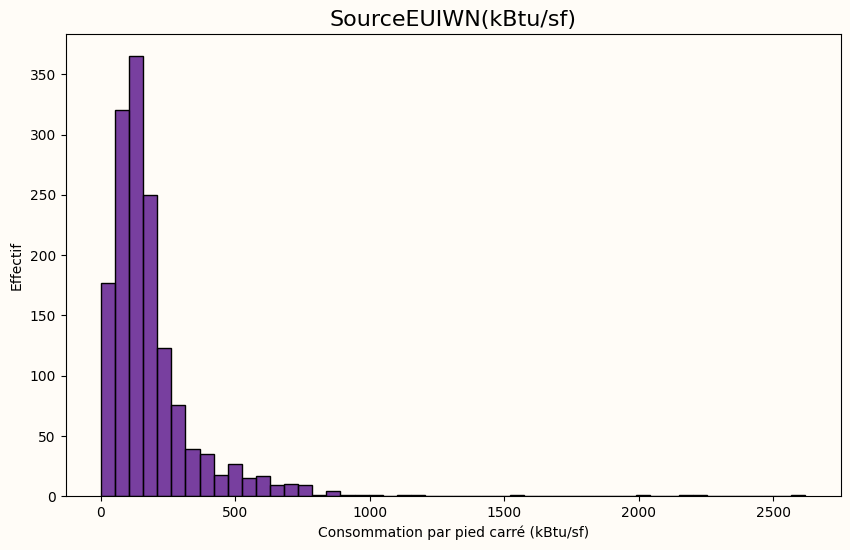

In [169]:
features_energy_use_intensity = [
    "SiteEUI(kBtu/sf)",
    "SiteEUIWN(kBtu/sf)",
    "SourceEUI(kBtu/sf)",
    "SourceEUIWN(kBtu/sf)"
]

for feature in features_energy_use_intensity:
    generate_histplot(
        df, 
        feature, 
        feature, 
        "Consommation par pied carré (kBtu/sf)", 
        "Effectif", 
        feature.lower(),
        color="indigo"
    )

# <a id='toc8_'></a>[8 - Analyse exploratoire multivariée](#toc0_)

## <a id='toc8_1_'></a>[Relation entre la target et les autres variables](#toc0_)

### <a id='toc8_1_1_'></a>[Target / Type de propriété](#toc0_)

Le graphique montre une variabilité considérable des émissions de CO2 entre différents types de propriétés. Les hôpitaux se détachent avec des émissions particulièrement élevées. En comparaison, les propriétés comme les entrepôts réfrigérés et les centres de distribution ont des émissions relativement faibles, ce qui pourrait refléter des pratiques efficaces de gestion énergétique.

Par ailleurs, le graphique indique des valeurs extrêmes ou des anomalies dans les données, suggérant une grande variabilité des émissions pour certains types de propriétés, comme les hôtels et les universités.

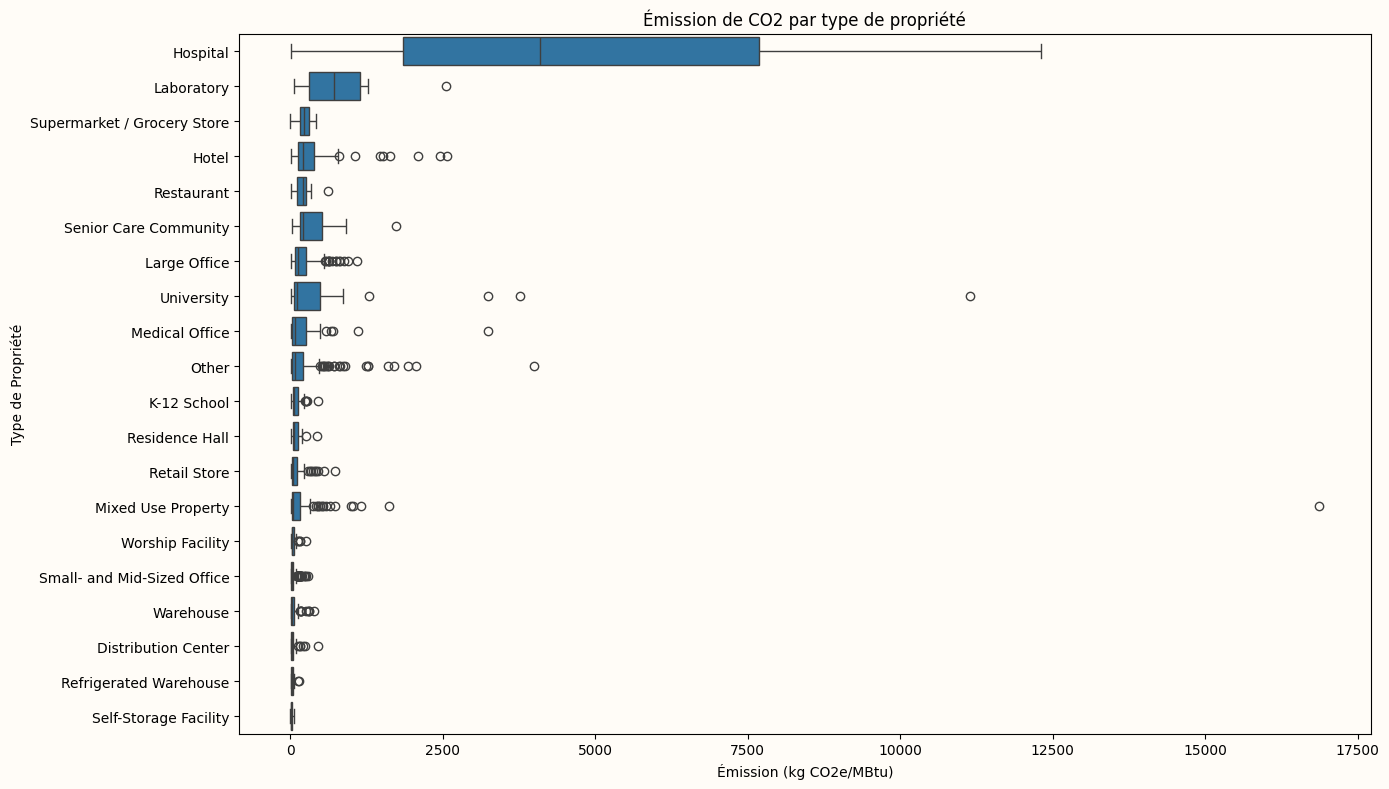

In [170]:
property_types = df["PrimaryPropertyType"].unique()

types_dict = {}
for type in property_types:
    types_dict[type] = (df.loc[df["PrimaryPropertyType"] == type, feature_target]).median()

sorted_types = sorted(types_dict.items(), key=lambda item: item[1], reverse=True)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x=feature_target, y="PrimaryPropertyType", orient="h", order=sorted([item[0] for item in sorted_types], key=lambda x: types_dict[x], reverse=True))
plt.title('Émission de CO2 par type de propriété')
plt.xlabel(feature_target_label)
plt.ylabel('Type de Propriété')

plt.tight_layout()

plt.savefig("../images/boxplot_co2_property_type.png")

plt.show()

### <a id='toc8_1_2_'></a>[Target / Localisation](#toc0_)

Aucune relation avérée entre la quantité de de CO2 émise par les propriétés et leur situation géographique.

Ceci nous indique que pour la suite des travaux nous vérifierons toute feature se rapportant à la situation géographique (coordonnées, quatier, zipcode etc...) afin de déterminer si elles impactent positivement la performance des modèles.

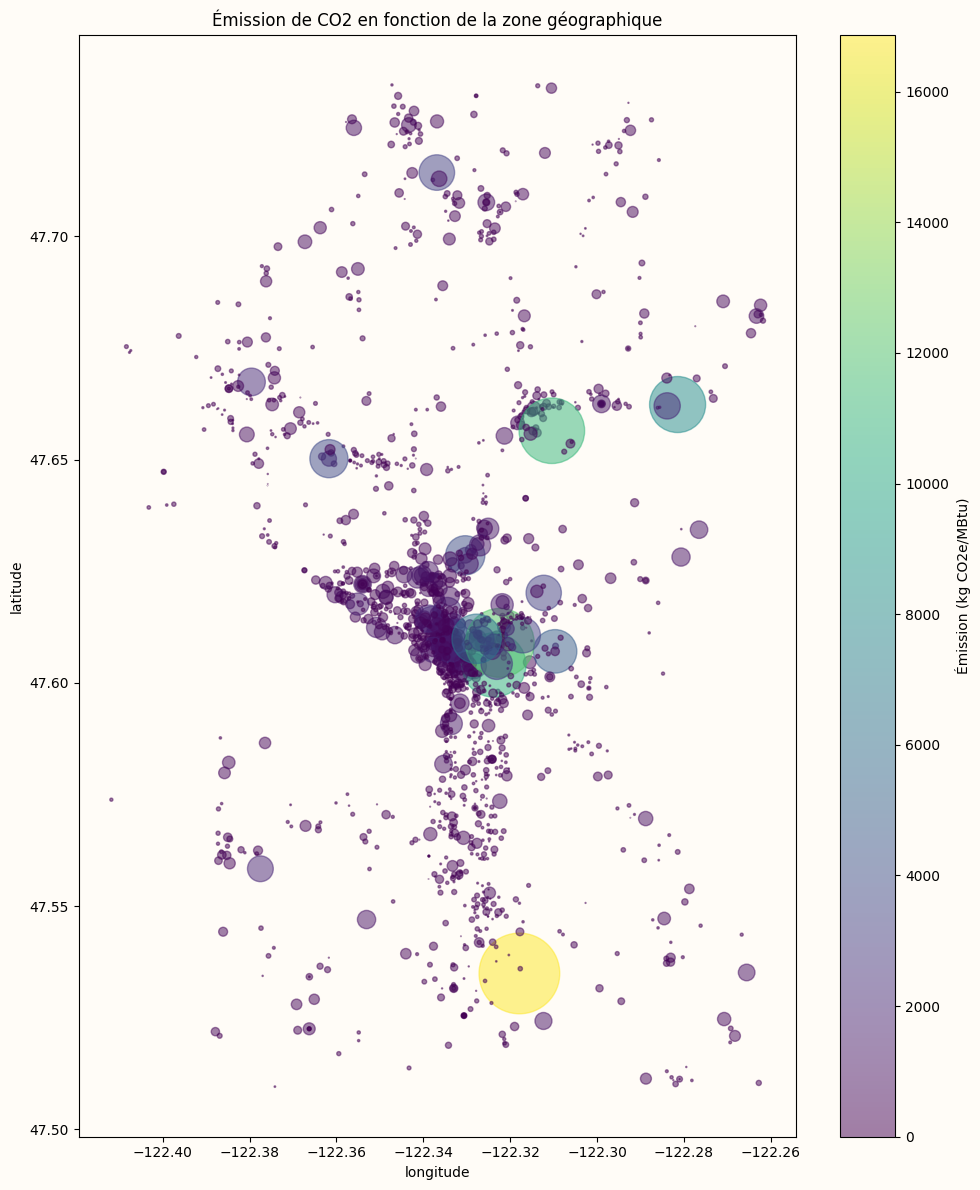

In [171]:
plt.figure(figsize=(10,12))
plt.scatter(
    x=df["Longitude"], 
    y=df["Latitude"], 
    alpha=0.5, 
    s=df[feature_target]/5, 
    c=df[feature_target], 
    cmap="viridis"
)
plt.title("Émission de CO2 en fonction de la zone géographique")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label=feature_target_label)

plt.tight_layout()
plt.savefig(f"../images/map_target_location")

plt.show()

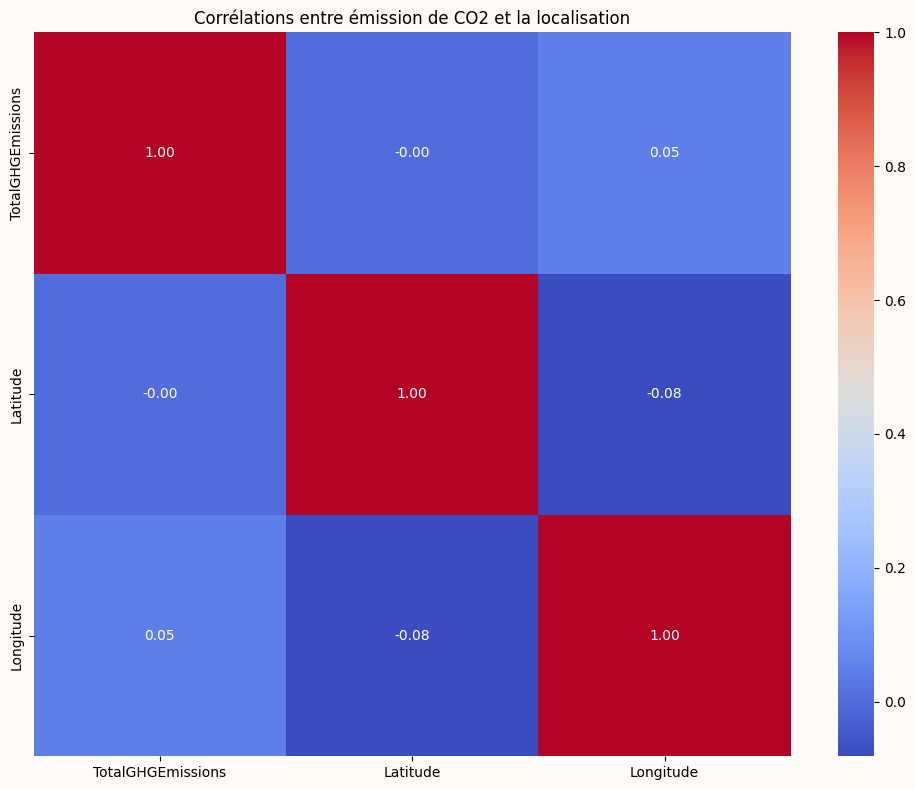

In [172]:
corr = df[[feature_target] + features_location].corr(method="pearson")
plt.figure(figsize=(10, 8))
ax = sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
ax.set_title("Corrélations entre émission de CO2 et la localisation")

plt.tight_layout()
plt.savefig(f"../images/correlation_target_location")

plt.show()

### <a id='toc8_1_3_'></a>[Target / Age de la propriété](#toc0_)

Il n’existe pas de tendance claire indiquant que les bâtiments plus anciens émettent nécessairement plus de CO2. Cela pourrait être dû à des rénovations et des mises à jour réussies dans des bâtiments plus anciens, conformes aux initiatives d'efficacité énergétique suivantes : 

* 1980 - Seattle Energy Code
* 1990 - Climate Action Plan
* 2000 - Green Building Program

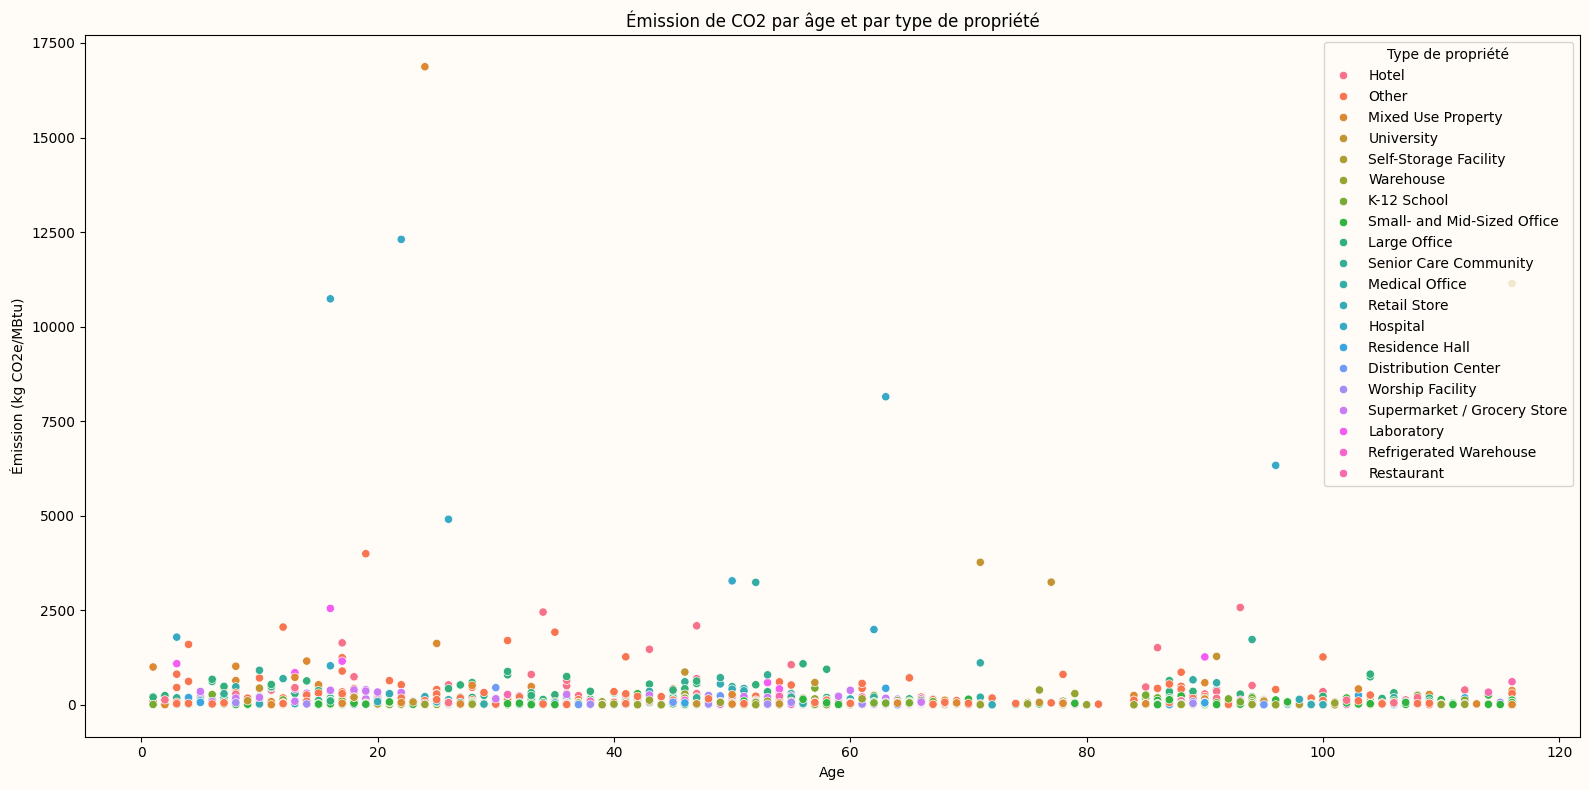

In [173]:
# Calcul de l'âge de chaque proriété
df["Age"] = 2016 - df["YearBuilt"]

plt.figure(figsize=(16,8), dpi=100)
sns.scatterplot(data=df, x="Age", y=feature_target, hue="PrimaryPropertyType")
plt.title("Émission de CO2 par âge et par type de propriété")
plt.legend(title="Type de propriété")
plt.ylabel(feature_target_label)

plt.tight_layout()
plt.savefig(f"../images/scatterplot_target_age")

plt.show()

### <a id='toc8_1_4_'></a>[Target / Energy score](#toc0_)

Aucune relation évidente non plus entre les émissions de GES et le score ENERGY STAR

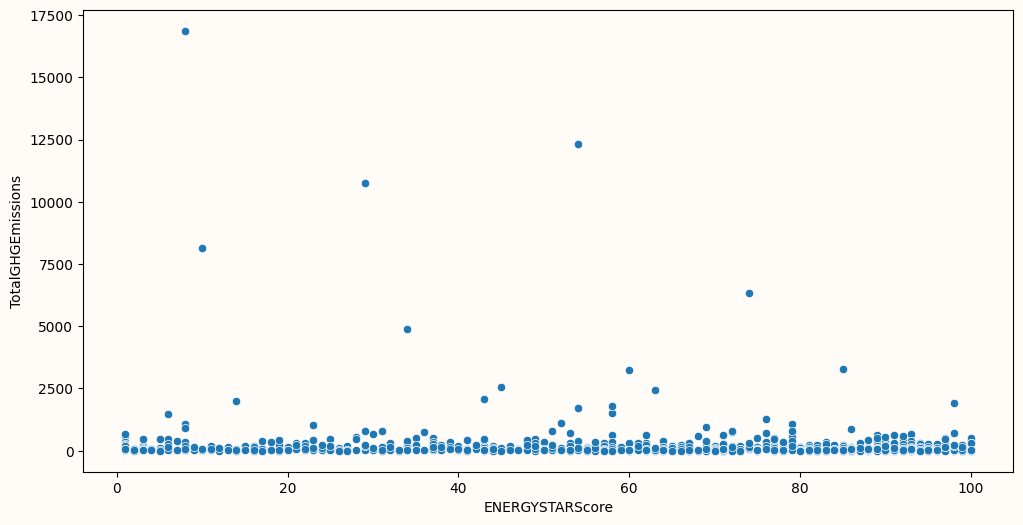

In [174]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x="ENERGYSTARScore", y=feature_target)

plt.show()

### <a id='toc8_1_5_'></a>[Target / Autres variables](#toc0_)

Les émissions totales de GES (`TotalGHGEmissions`) montrent des corrélations significatives avec plusieurs indicateurs dans les données, notamment l'utilisation de l'énergie sur le site (`SiteEnergyUseKbtu`) et l'énergie utilisée par unité de surface (`SiteEnergyUseWNkbtu`). Cependant, il est important de noter que plusieurs de ces indicateurs sont également fortement corrélés entre eux.

Les features que nous retiendrons pour la suite pour la prédiction de `TotalGHGEmissions` sont :

* `NumberofBuildings`
* `LargestPropertyUseTypeGFA`
* `SecondLargestPropertyUseTypeGFA`
* `ThirdLargestPropertyUseTypeGFA`
* `SteamUse(kBtu)`
* `Electricity(kBtu)`
* `NaturalGas(kBtu)`
* `SiteEnergyUse(kBtu)`

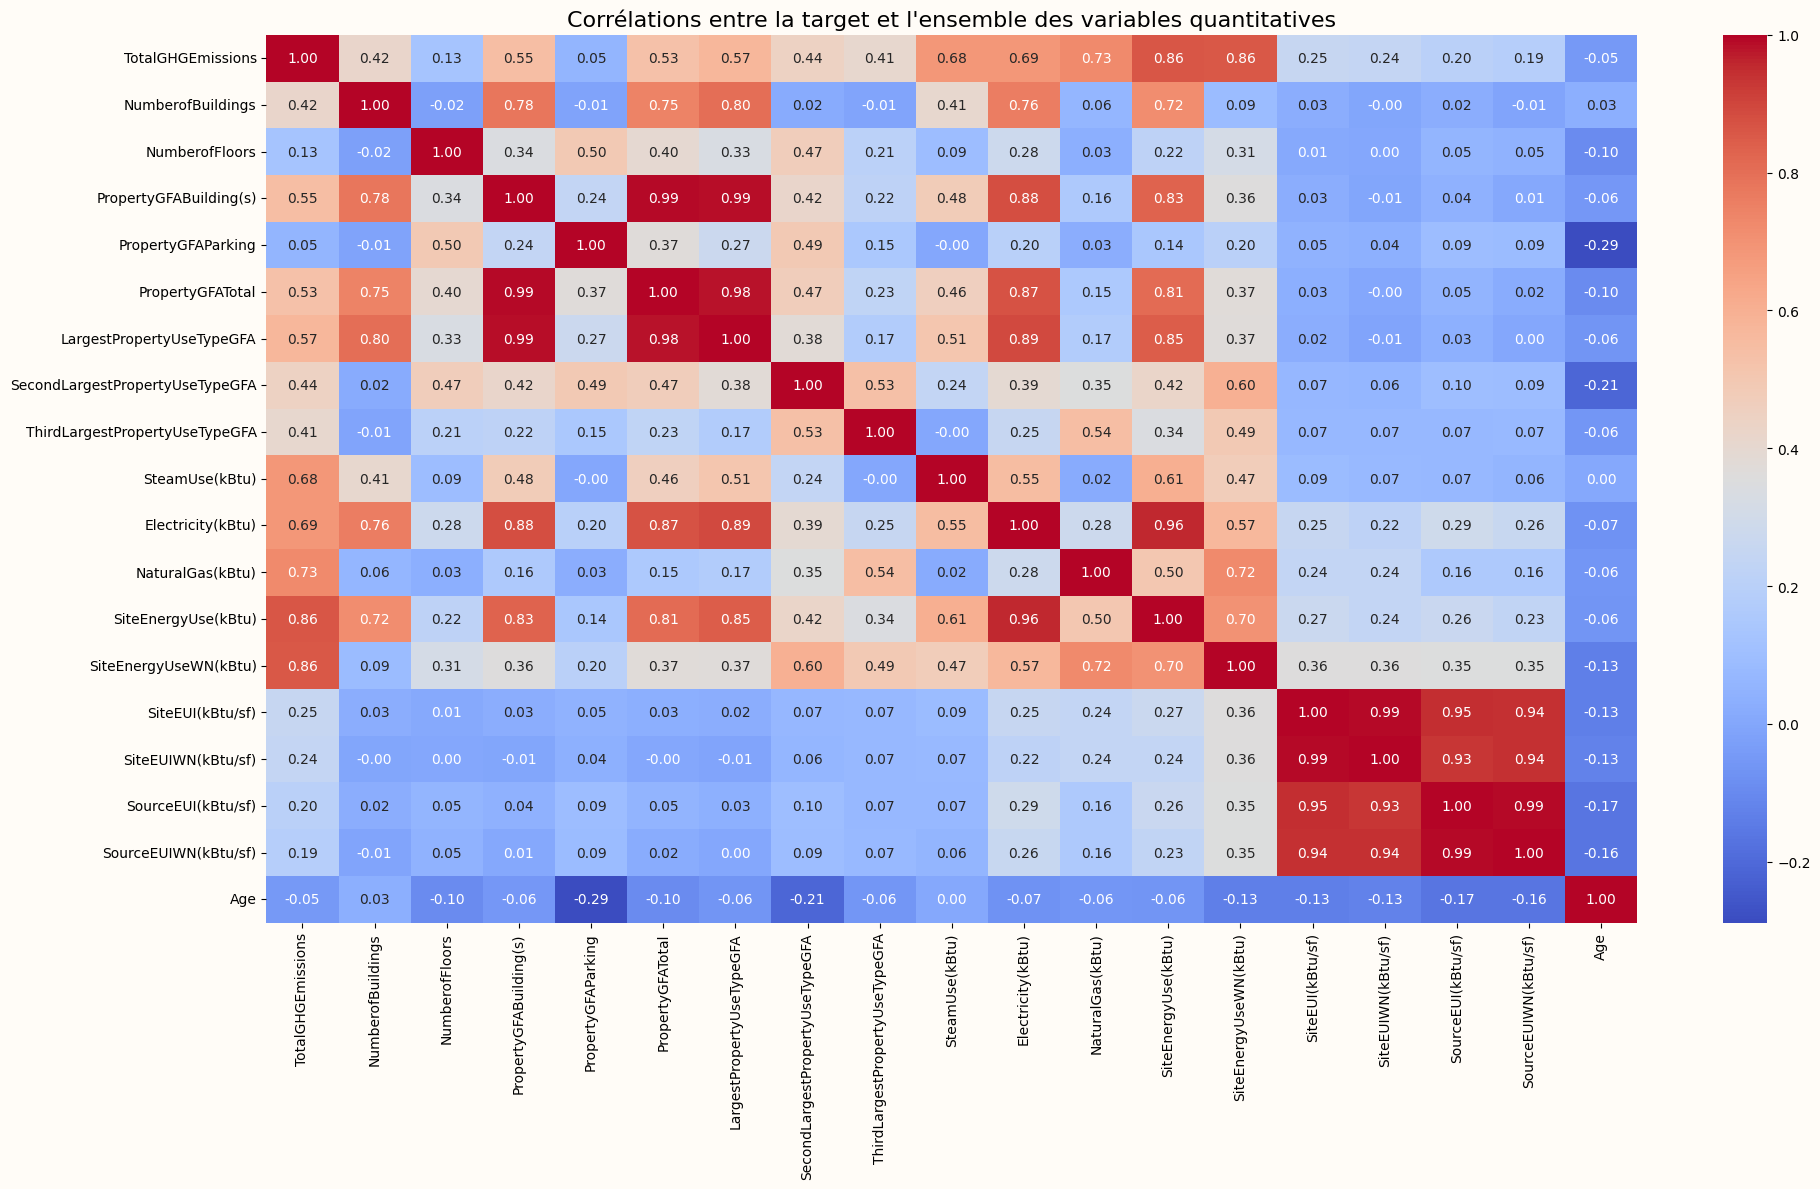

In [175]:
features = [feature_target] + features_property_configuration + features_gfa + features_energy_types_use + features_energy_use_intensity + ["Age"]
corr = df[features].corr(method="pearson")
plt.figure(figsize=(20, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Corrélations entre la target et l'ensemble des variables quantitatives", fontsize=16)

plt.tight_layout()
plt.savefig(f"../images/correlation_target_vs_quantitative_variables")

plt.show()

# <a id='toc9_'></a>[9 - Conclusions initiales](#toc0_)

Un peu plus de 1500 observations subsistent suite au nettoyage des données

In [176]:
df.shape

(1505, 44)

In [177]:
df.sample(5)

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
2187          24714      2016  NonResidential                    Warehouse   
1314          21505      2016  NonResidential  Small- and Mid-Sized Office   
2146          24598      2016  NonResidential       Refrigerated Warehouse   
76              113      2016  NonResidential  Small- and Mid-Sized Office   
3121          36034      2016  NonResidential                 Retail Store   

               PropertyName                Address     City State  ZipCode  \
2187           Great Floors         1251 1st Ave S  Seattle    WA  98111.0   
1314  U0010 - Union Stables    2200 Western Avenue  Seattle    WA  98121.0   
2146        bnr corporation  2250 occidental ave s  Seattle    WA  98134.0   
76                    KCTS9          401 Mercer St  Seattle    WA  98109.0   
3121         Harvard Market          1401 Broadway  Seattle    WA  98122.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
2187                    7666206990                    2   
1314                    1977200605                    7   
2146                    7666206133                    2   
76                      1988200705                    7   
3121                    3148650000                    3   

               Neighborhood   Latitude   Longitude  YearBuilt  \
2187       GREATER DUWAMISH  47.590810 -122.334870       1938   
1314               DOWNTOWN  47.612300 -122.346110       1909   
2146       GREATER DUWAMISH  47.582170 -122.332630       1955   
76    MAGNOLIA / QUEEN ANNE  47.623910 -122.348370       1986   
3121                   EAST  47.613788 -122.321426       1996   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2187                1.0               2             41276                   0   
1314                1.0               5             66900                   0   
2146                1.0               2             21870                   0   
76                  0.0               2             66240                2352   
3121                0.0               3             45743                   0   

      PropertyGFABuilding(s)  \
2187                   41276   
1314                   66900   
2146                   21870   
76                     63888   
3121                   45743   

                              ListOfAllPropertyUseTypes  \
2187   Non-Refrigerated Warehouse, Office, Retail Store   
1314                                             Office   
2146                             Refrigerated Warehouse   
76    Data Center, Distribution Center, Office, Park...   
3121                                       Retail Store   

          LargestPropertyUseType  LargestPropertyUseTypeGFA  \
2187  Non-Refrigerated Warehouse                    24300.0   
1314                      Office                    68048.0   
2146      Refrigerated Warehouse                    21870.0   
76                        Office                    45900.0   
3121                Retail Store                    45243.0   

     SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
2187                 Retail Store                          13284.0   
1314                      Unknown                              0.0   
2146                      Unknown                              0.0   
76                    Data Center                           5181.0   
3121                      Unknown                              0.0   

     ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
2187                      Office                          3692.0   
1314                     Unknown                             0.0   
2146                     Unknown                             0.0   
76           Distribution Center                          4551.0   
3121                     Unknown                             0.0   

      ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
2187           

In [178]:
# Exportation du DataFrame vers un fichier csv
df.to_csv("../datasets/Seattle.csv", index=False)